<a href="https://colab.research.google.com/github/Derrick-Majani/Trade-Ahead/blob/main/Trade%26Ahead_Derrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trade&Ahead - Problem Statement

## Description

### Context
The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

 
## Objective
Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

 
### Data Description

The data provided is of stock prices and some financial indicators like ROE, earnings per share, P/E ratio, etc.

## Data Dictionary
- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
-GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np
import io
import os
import sys
import pandas_profiling
import seaborn as sns
sns.set(color_codes=True)

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA
from scipy.stats import zscore

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# To supress warnings
import warnings

# warnings.filterwarnings("ignore")



## Data Overview

- Observations
- Sanity checks

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
# loading the dataset
df = pd.read_csv('/content/gdrive/MyDrive/stock_data.csv')
df.sample(n=5)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
44,BHI,Baker Hughes Inc,Energy,Oil & Gas Equipment & Services,46.150,-12.312,2.560,12,84,584000000,-1967000000,-4.490,438084632.500,93.089,13.491
79,CTL,CenturyLink Inc,Telecommunications Services,Integrated Telecommunications Services,25.160,0.159,1.522,6,3,-2000000,878000000,1.580,555696202.500,15.924,-13.383
289,TDC,Teradata Corp.,Information Technology,Application Software,26.420,-8.834,2.731,25,88,5000000,-214000000,-1.530,139869281.000,74.556,4.068
73,CNC,Centene Corporation,Health Care,Managed Health Care,65.810,21.713,2.299,16,70,150000000,355000000,2.990,118729097.000,22.010,-1.305
189,LMT,Lockheed Martin Corp.,Industrials,Aerospace & Defense,217.150,5.254,0.903,116,8,-356000000,3605000000,11.620,310240963.900,18.688,-10.853


In [ ]:
# checking shape
df.shape

(340, 15)

In [ ]:
# let's look at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- Ticker Symbol, Security, GICS Sector, GICS Sub Industry are of object type.
- ROE,Cash Ratio, Net Cash Flow and Net Income are of Integer type and the rest of the variables are of float

In [ ]:
# Replace Security column with Company
# fixing column names
df = df.rename({'Security': 'Company'}, axis=1)
df.columns

Index(['Ticker Symbol', 'Company', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

In [ ]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

In [ ]:
# let's view the statistical summary of the non-numerical columns in the data
df.describe(exclude=np.number).T.style.highlight_max(color="lightgreen", axis=0)

,count,unique,top,freq
Ticker_Symbol,340,340,UNM,1
Company,340,340,Realty Income Corporation,1
GICS_Sector,340,11,Industrials,53
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16


- Industrials Sector best defines business operations as assigned by Global Industry Classification Standard (GICS) 
- Oil & Gas Exploration & Production best defines business operations as assigned by Global Industry Classification Standard (GICS)

In [ ]:
# let's view the statistical summary of numerical columns in the data
df.describe(include=np.number).T.style.highlight_min(color="lightgreen", axis=0)

,count,mean,std,min,25%,50%,75%,max
Current_Price,340.000000,80.862345,98.055086,4.500000,38.555000,59.705000,92.880001,1274.949951
Price_Change,340.000000,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.000000,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.000000,39.597059,96.547538,1.000000,9.750000,15.000000,27.000000,917.000000
Cash_Ratio,340.000000,70.023529,90.421331,0.000000,18.000000,47.000000,99.000000,958.000000
Net_Cash_Flow,340.000000,55537620.588235,1946365312.175789,-11208000000.000000,-193906500.000000,2098000.000000,169810750.000000,20764000000.000000
Net_Income,340.000000,1494384602.941176,3940150279.327937,-23528000000.000000,352301250.000000,707336000.000000,1899000000.000000,24442000000.000000
Earnings_Per_Share,340.000000,2.776662,6.587779,-61.200000,1.557500,2.895000,4.620000,50.090000
Estimated_Shares_Outstanding,340.000000,577028337.754029,845849595.417695,27672156.860000,158848216.100000,309675137.800000,573117457.325000,6159292035.000000
P/E_Ratio,340.000000,32.612563,44.348731,2.935451,15.044653,20.819876,31.764755,528.039074


- There is a large difference on Current Price between the 3rd quartile and the maximum value which could indicate presence of outliers.
- Price change highly affected to negative(47).This could imply poor performance/decrease in Stock Prices that needs to be investigated.
- Cash Ratio of zero(minimum) would imply there is no cash reserves completely while we have liabilities. This needs to be investigated.
-ROE,Earnings Per Share,P/E Ratio and P/B Ratio has a large difference between the max value(75%) and the max value which could indicate possibilities of outliers.
- ROE (Return on Equity) is minimum at 1. It would be interesting to investigating the stocks giving a very low ROE as its not worth to shareholders as compared to maximum value of 917.

In [ ]:
# let's check how many products have Cash Ratio 0
(df.Cash_Ratio == 0).sum()

4

In [ ]:
# let's check the products which have Cash Ratio 0
df[(df.Cash_Ratio == 0)]

,Ticker_Symbol,Company,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
64,CHTR,Charter Communications,Consumer Discretionary,Cable & Satellite,183.100,3.599,1.698,589,0,2000000,-271000000,-2.430,111522633.700,20.820,-76.119
76,COG,Cabot Oil & Gas,Energy,Oil & Gas Exploration & Production,17.690,-20.099,3.056,6,0,-20440000,-113891000,-0.280,406753571.400,93.089,-0.223
190,LNT,Alliant Energy Corp,Utilities,Electric Utilities,31.225,6.643,1.116,10,0,-51100000,388400000,3.360,115595238.100,9.293,-4.607
267,RRC,Range Resources Corp.,Energy,Oil & Gas Exploration & Production,24.610,-25.107,3.713,26,0,23000,-713685000,-4.290,166360139.900,93.089,0.525


- We see two stocks with positive Net_Cash_Flow(The difference between a 
company's cash inflows and outflows (in dollars)), yet the Cash Ratio.This could possibly be missing values and should be investigated

In [ ]:
# let's check how many products have ROE of 1
(df.ROE == 1).sum()

3

In [ ]:
# let's check the products which have ROE of 1
df[(df.ROE == 1)].style.highlight_max(color="lightgreen", axis=0)

,Ticker_Symbol,Company,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
84,CXO,Concho Resources,Energy,Oil & Gas Exploration & Production,92.860001,-2.744032,2.692546,1,38,228529000,65900000,0.540000,122037037.000000,171.962965,5.673991
180,KMI,Kinder Morgan,Energy,Oil & Gas Refining & Marketing & Transportation,14.920000,-47.129693,3.139352,1,7,-86000000,253000000,0.100000,2530000000.000000,149.200000,-1.894071
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.780000,188461538.500000,131.525636,-23.884449


- Ticker_Symbol ZBH has high stock price of 102 which is above the average Current Price of 80. Review needs to be conducted on this stock as it seems to perfom well in all other factors however a lower ROE of 1
- Lower Current Price of KMI has impacted on the lower ROE yet Estimated Shares Outstadning is the highest.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

# 1. What does the distribution of stock prices look like?

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="white"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

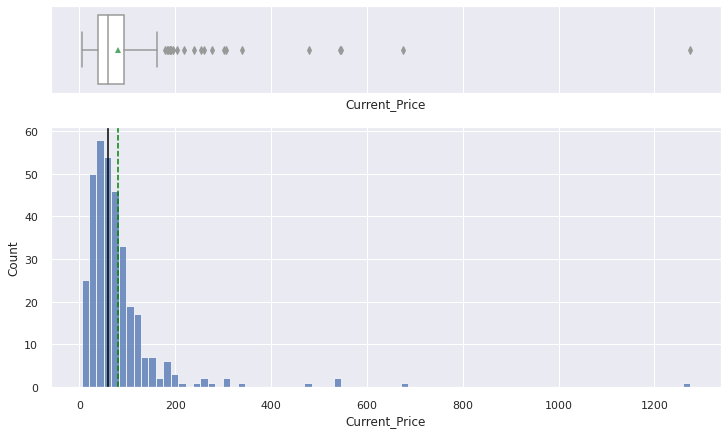

In [ ]:
# Observations on Current Price 
histogram_boxplot(df, "Current_Price")

- Current stock prices are skewed to the right.
- There are outliers to the right of the variables as they are real values we shall not treat

# 2. The stocks of which economic sector have seen the maximum price increase on average?

In [ ]:
df.groupby("GICS_Sector")["Current_Price"].mean()

GICS_Sector
Consumer Discretionary        128.095
Consumer Staples               71.973
Energy                         46.042
Financials                     58.659
Health Care                   132.048
Industrials                    74.412
Information Technology         63.548
Materials                      76.552
Real Estate                    90.977
Telecommunications Services    32.964
Utilities                      52.969
Name: Current_Price, dtype: float64

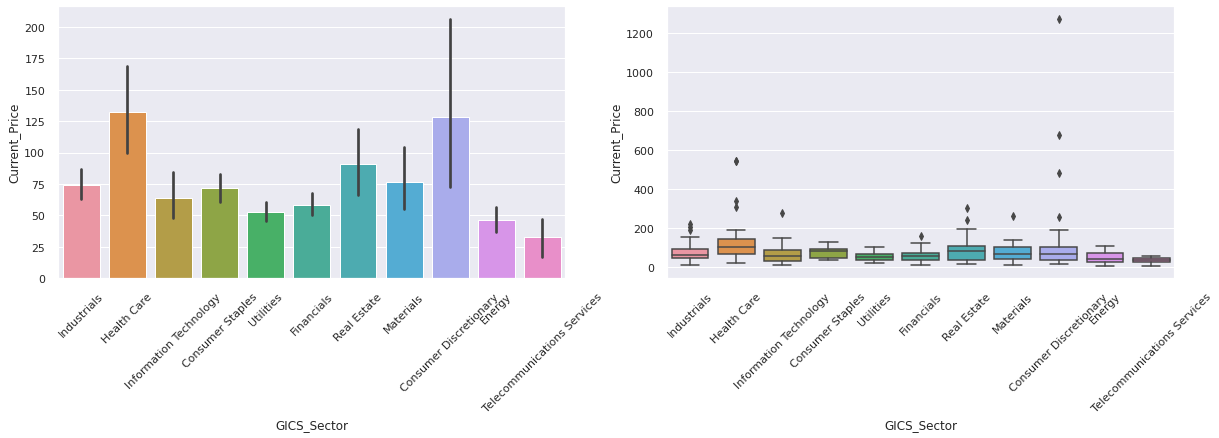

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="Current_Price", x="GICS_Sector")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="Current_Price", x="GICS_Sector")
plt.xticks(rotation=45)

plt.show()

- Health Care economic sector followed by Consumer Discretionary         have the highest % change/increase in Stock Price on average

# 3. How are the different variables correlated with each other?

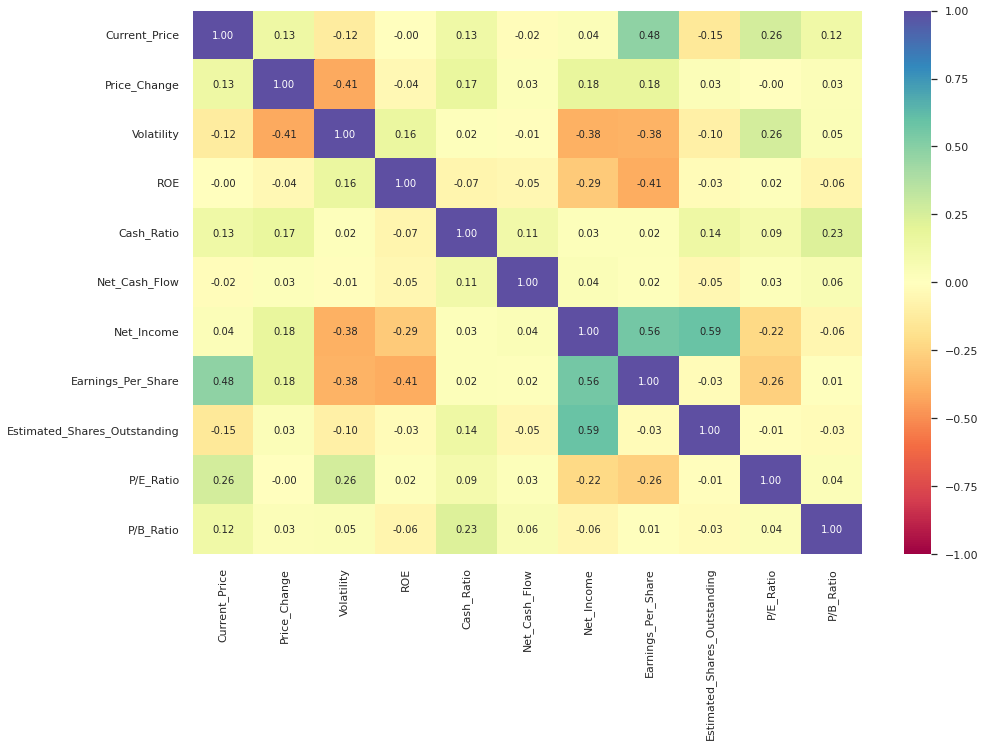

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Estimated Shares Outstanding is positively correlated to Net Income
- Earnigns Per Share is also positively correlated with Net Income
- Current Price is positively correlated with Earnings Per Share.
- Earnings Per Share is negatively correlated to ROE

# 4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

In [ ]:
df.groupby("GICS_Sector")["Cash_Ratio"].mean()

GICS_Sector
Consumer Discretionary         49.575
Consumer Staples               70.947
Energy                         51.133
Financials                     98.592
Health Care                   103.775
Industrials                    36.189
Information Technology        149.818
Materials                      41.700
Real Estate                    50.111
Telecommunications Services   117.000
Utilities                      13.625
Name: Cash_Ratio, dtype: float64

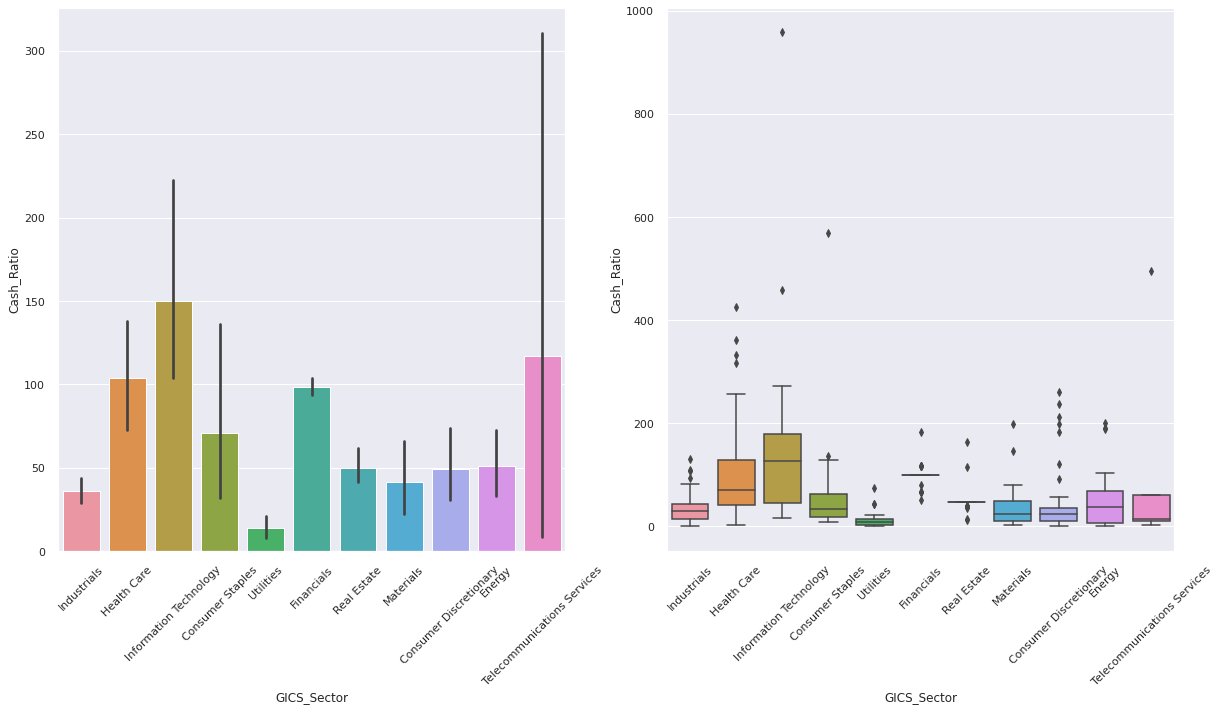

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="Cash_Ratio", x="GICS_Sector")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="Cash_Ratio", x="GICS_Sector")
plt.xticks(rotation=45)

plt.show()

- Information Technology sector is the highest Cash Ratio followed by Telecommunications Services.
- Utilities has the least Cash Ratio among the various economic Sectors

# 5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [ ]:
df.groupby("GICS_Sector")["P/E_Ratio"].mean()

GICS_Sector
Consumer Discretionary        35.212
Consumer Staples              25.521
Energy                        72.898
Financials                    16.023
Health Care                   41.135
Industrials                   18.259
Information Technology        43.783
Materials                     24.585
Real Estate                   43.066
Telecommunications Services   12.223
Utilities                     18.719
Name: P/E_Ratio, dtype: float64

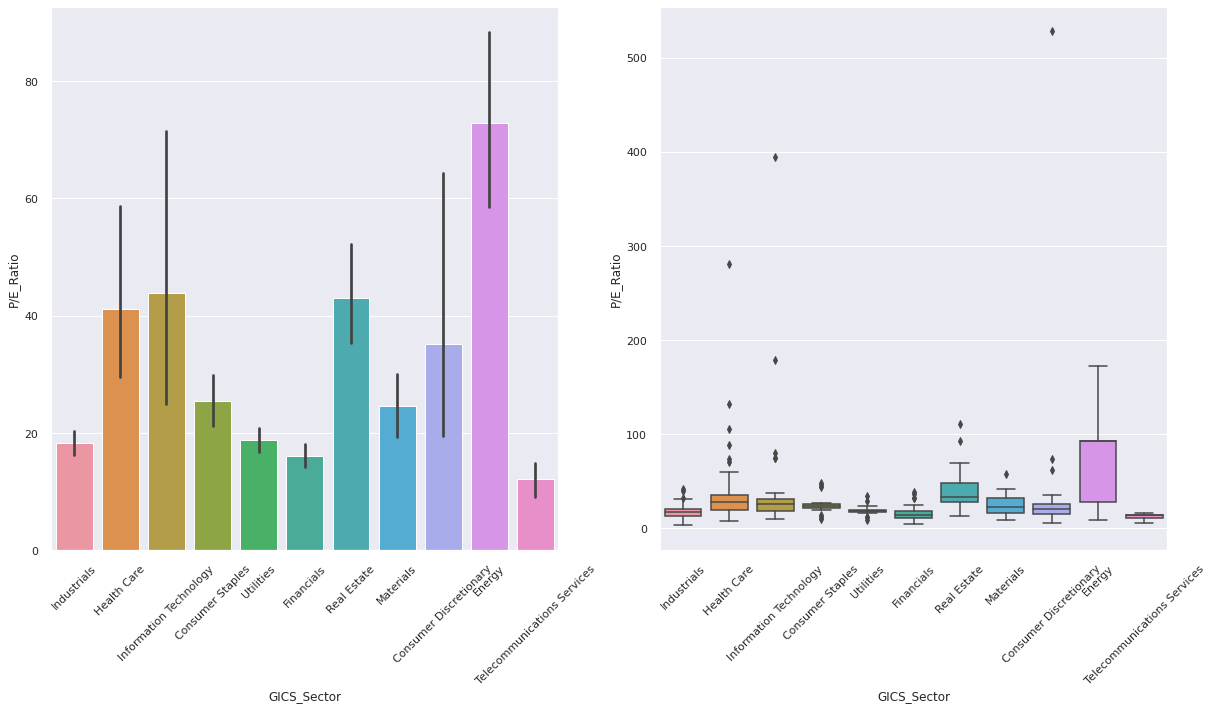

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y="P/E_Ratio", x="GICS_Sector")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="P/E_Ratio", x="GICS_Sector")
plt.xticks(rotation=45)

plt.show()

- Energy Sector has the highest P/E Ratio
- Telecommunications Services has the lowest P/E Ratio

## Exploratory Data Analysis (EDA)- Univariate Analysis


# Observation on Price_Change

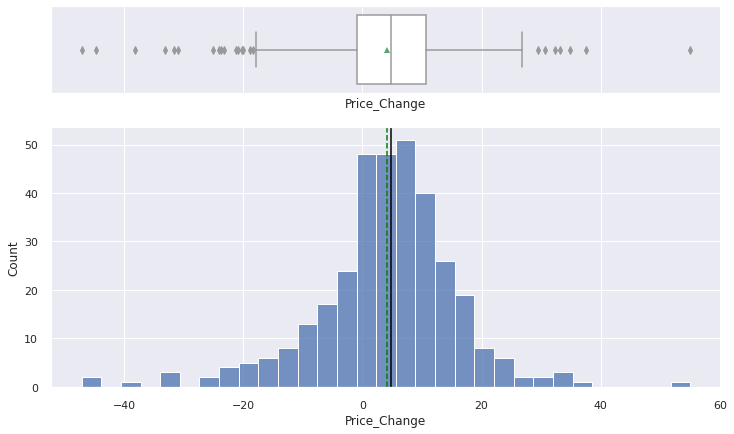

In [ ]:
# Observations on Current Price 
histogram_boxplot(df, "Price_Change")

- Price change is normally distributed with a mean of 4%.
- Outliers are on both sides 

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="white"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

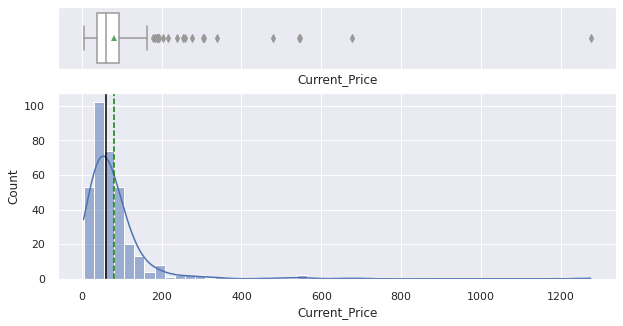

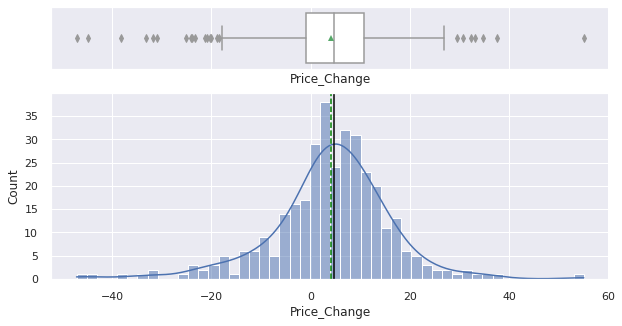

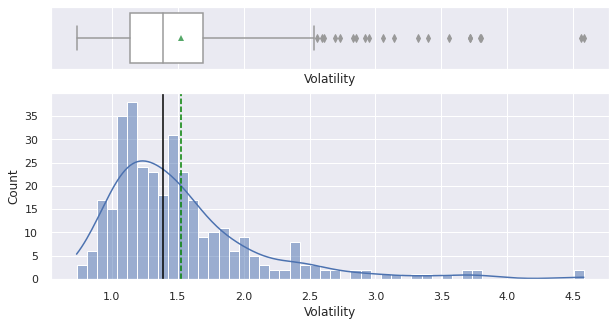

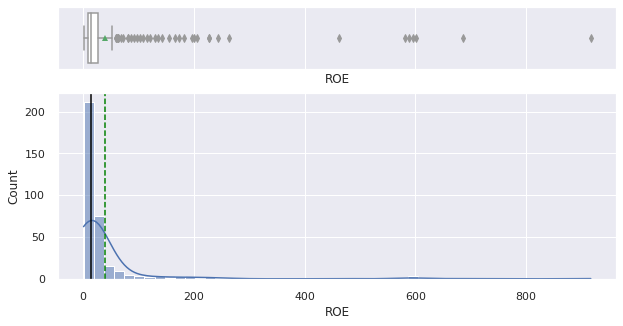

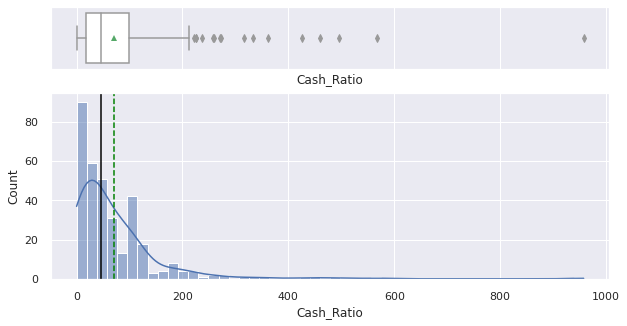

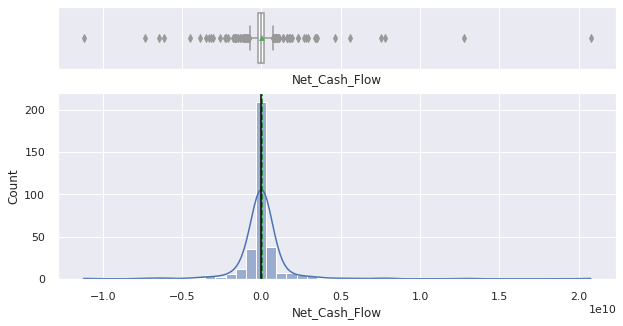

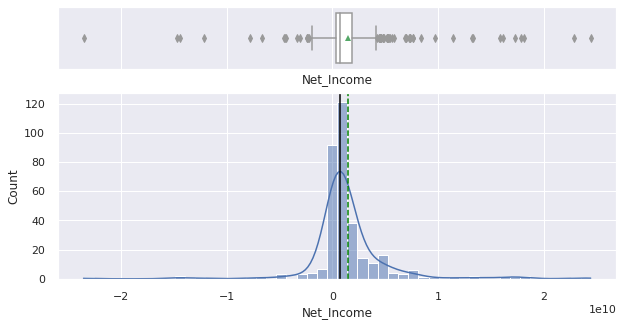

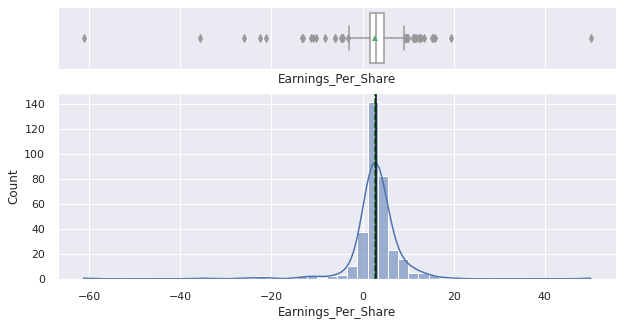

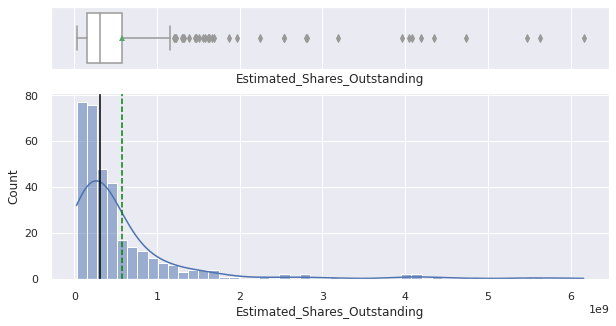

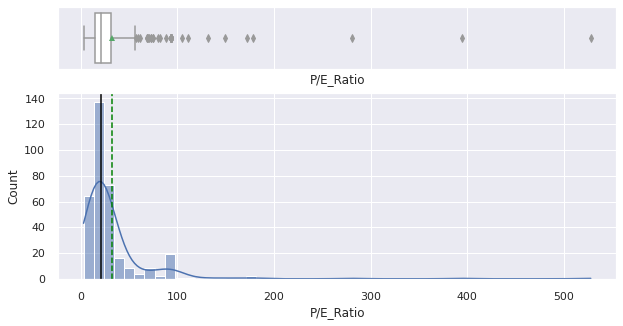

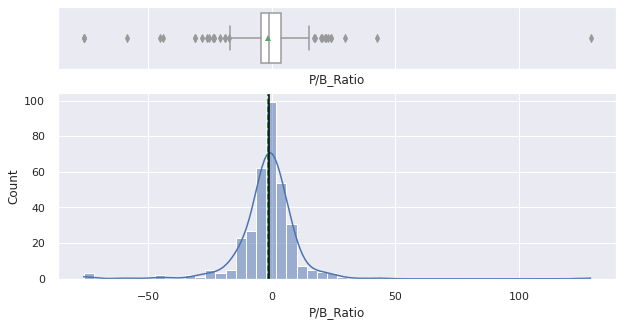

In [ ]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

- All numerical variables have outliers 
- P/B Ratio is normally disstributed.
- P/E Ratio is skewed to the right with outliers to the right.
-Estimated Shares Outstanding is skewed to the right with outliers present to the right.
- Earnings Per Share is normally distributed with outliers on both ends.
- Volatility is skewed to the left with outliers to the right.

In [ ]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

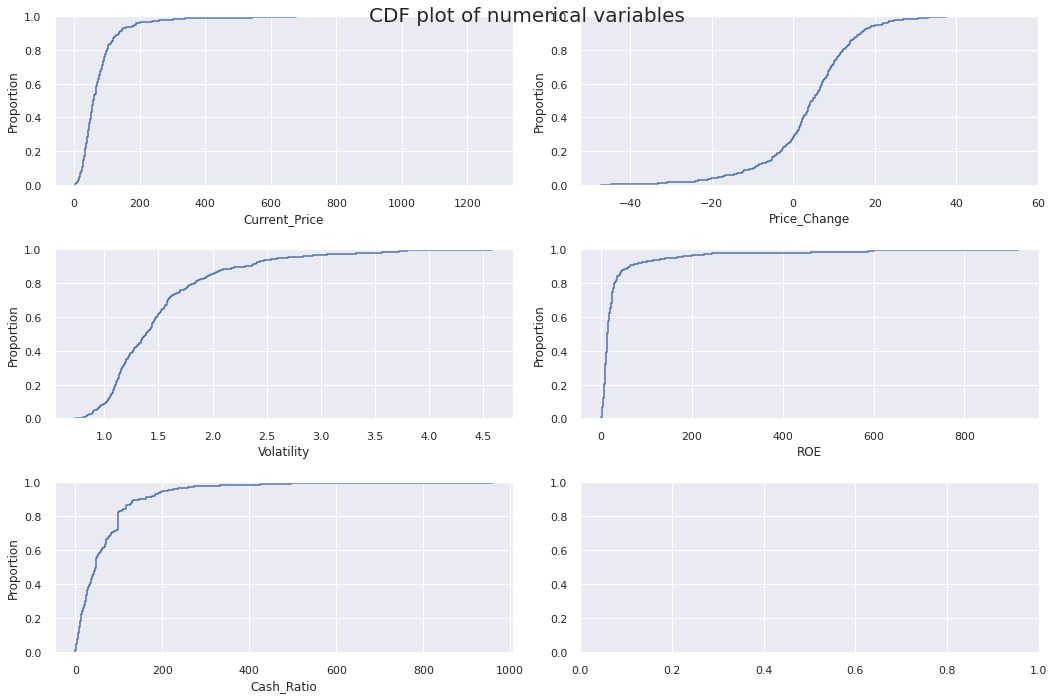

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

- Current Prices increases then flattens out at estimated $400.

- % Change in stock prices increase steadily from negative to positive and starts to stagnate above 20%.
- Estimated over 90% of the volatility is below 3 standard deviations of the stock prices over the 13 weeks.
- Over 90% of the Cash_Ratio falls within $ 400
- 90% of the ROE falls within 200

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# Observations on GICS_Sector

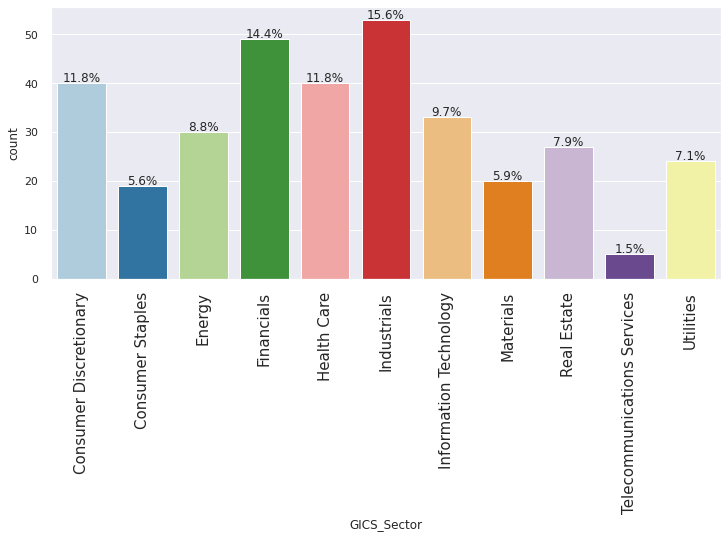

In [ ]:
labeled_barplot(df, "GICS_Sector", perc=True)

- Industrials followed by Financials are the highest economic Sectors assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations.
Telecommunications Services is the least economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations

# Observarions on GICS Sub Industry

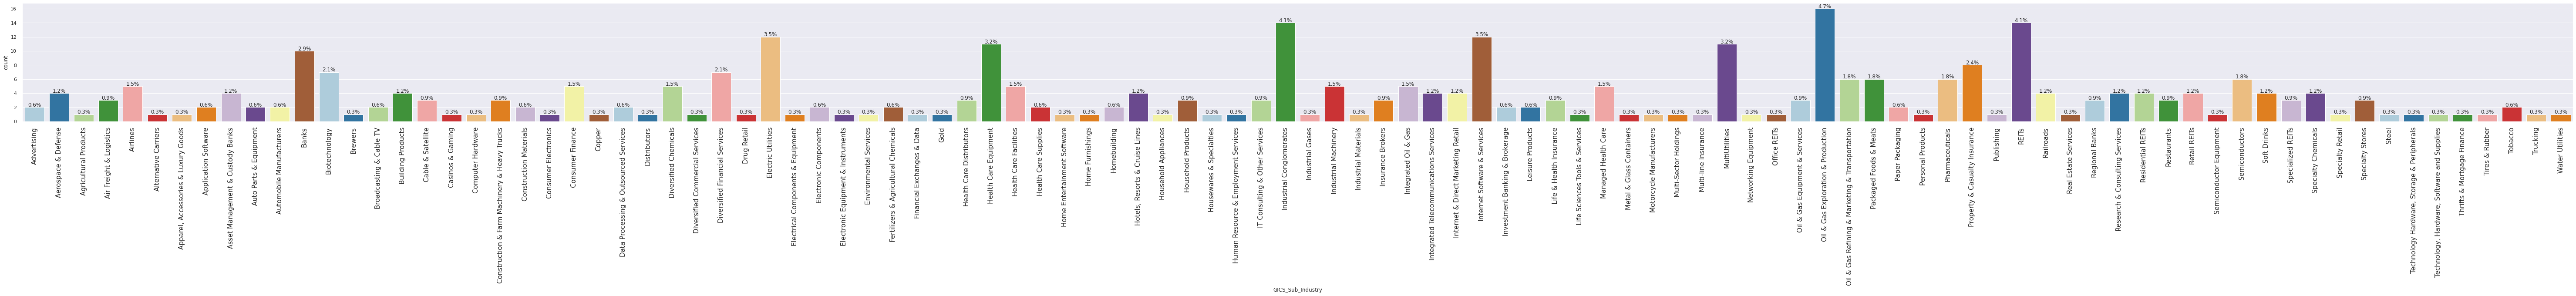

In [ ]:
labeled_barplot(df, "GICS_Sub_Industry", perc=True)

- Oil & Gas Exploration & Production is the highest sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations

## Bivariate Analysis

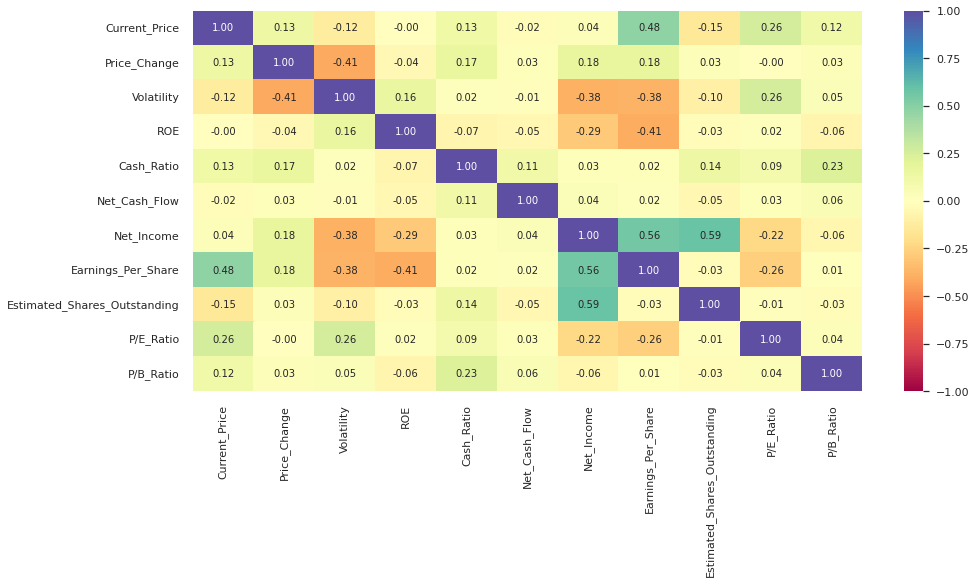

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Estimated Shares Outstanding is positively correlated to Net Income
- Earnigns Per Share is also positively correlated with Net Income
- Current Price is positively correlated with Earnings Per Share.
- Earnings Per Share is negatively correlated to ROE

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

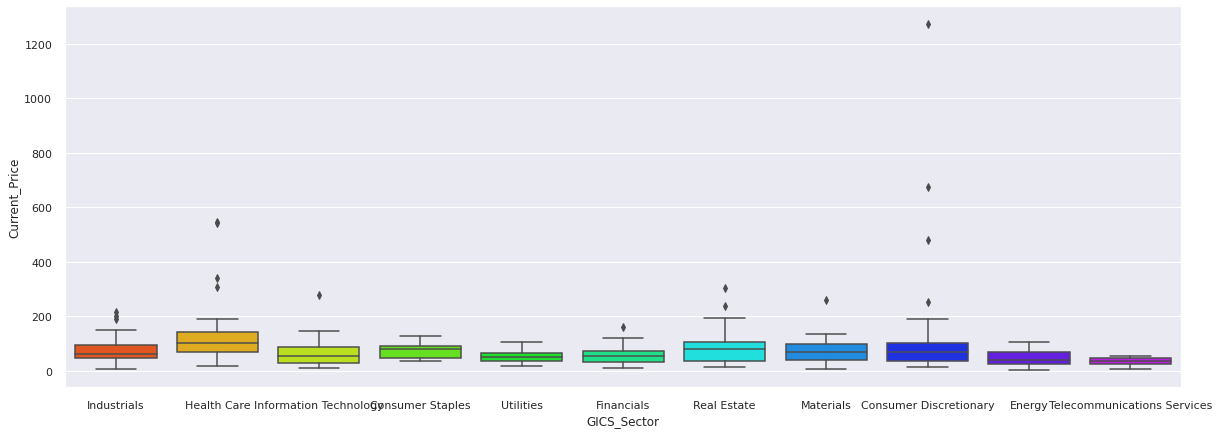

In [ ]:
plt.figure(figsize=(20, 7))
sns.boxplot(
    data=df, x="GICS_Sector", y="Current_Price", palette="gist_rainbow"
)
plt.show()

- Health Care Sector has the highest stock price.
- Telecommunications Services has the lowest stock price

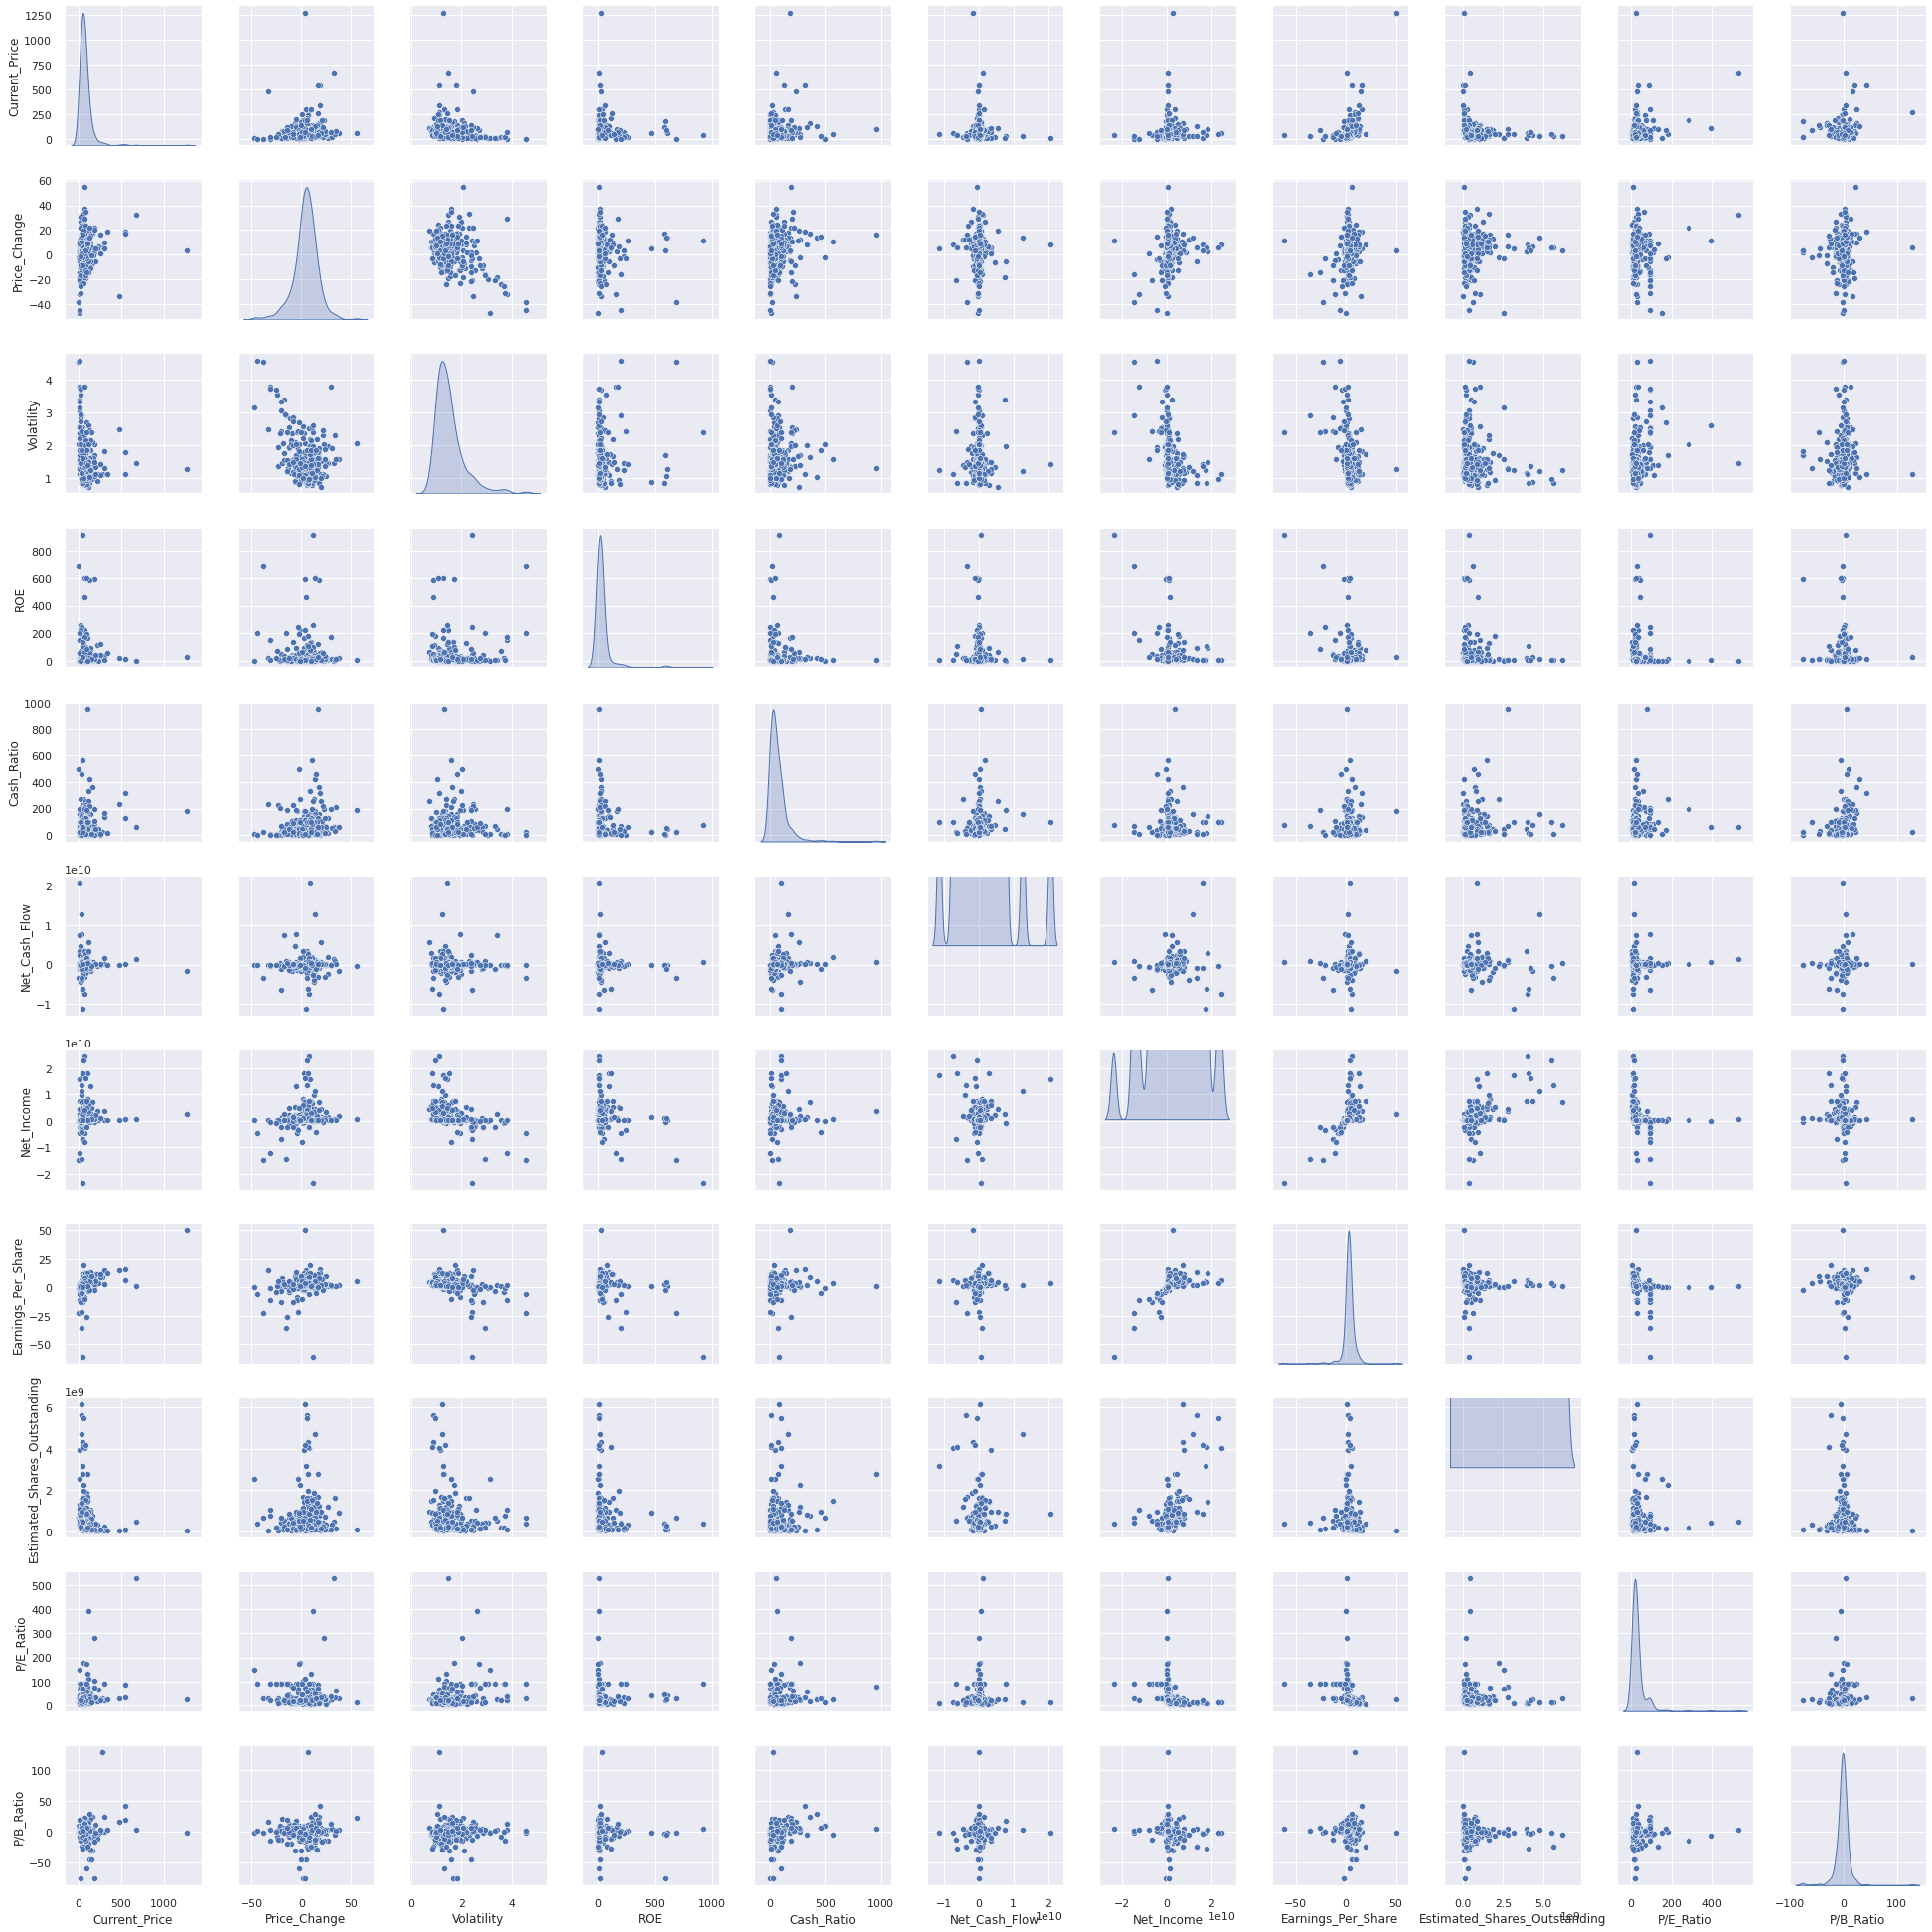

In [ ]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

- most of the variables have little or less Correlation and are distributed in different patterns.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [ ]:
# Checking duplicates
df.duplicated().any().sum()

0

- There are no duplicates in the data

In [ ]:
# Checking for missing values.
df.isnull().sum()

Ticker_Symbol                   0
Company                         0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

- There are no missing values in the data.

# Outlier Check

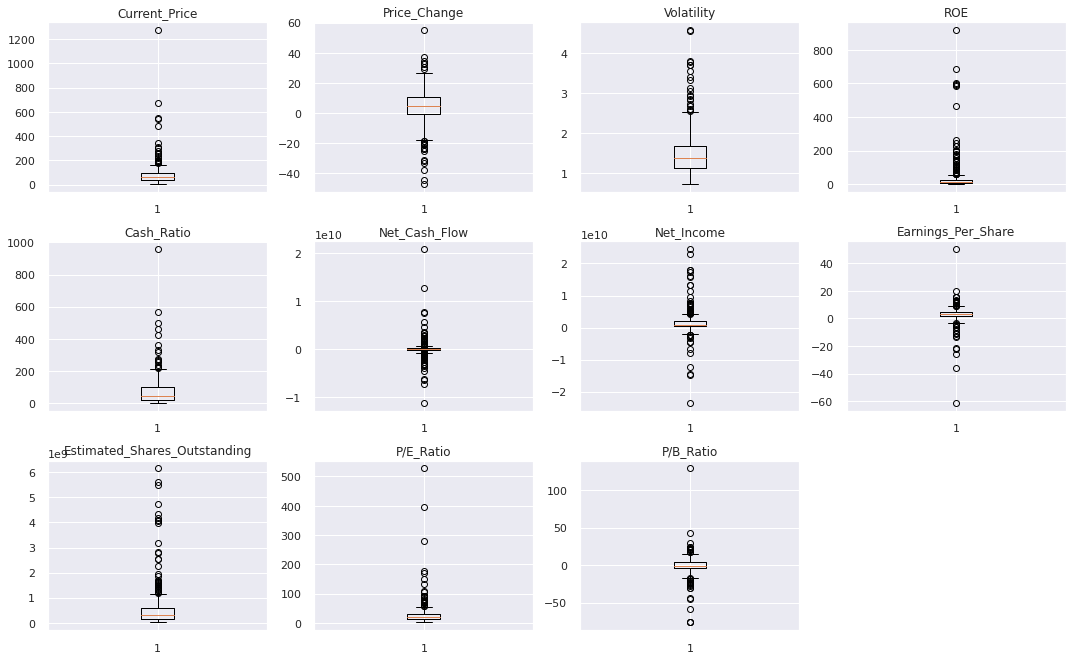

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- All the numerical values have outliers
- We shall not treat them as they are proper values

## K-means Clustering

In [ ]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.269236715539074
Number of Clusters: 4 	Average Distortion: 2.1822426161442072
Number of Clusters: 5 	Average Distortion: 2.1091250124562206
Number of Clusters: 6 	Average Distortion: 2.0728396786085272
Number of Clusters: 7 	Average Distortion: 2.037807785513024
Number of Clusters: 8 	Average Distortion: 1.9762548684920105


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

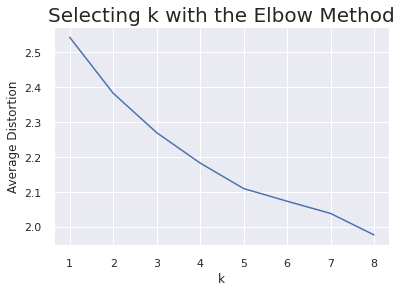

In [ ]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**The appropriate value of k from the elbow curve seems to be 3 or 4.**

For n_clusters = 2, silhouette score is 0.4484662124740991
For n_clusters = 3, silhouette score is 0.4644405674779404
For n_clusters = 4, silhouette score is 0.4449648894354543
For n_clusters = 5, silhouette score is 0.35853065935207434
For n_clusters = 6, silhouette score is 0.4157339853908722
For n_clusters = 7, silhouette score is 0.3960262457515913
For n_clusters = 8, silhouette score is 0.3919802667646185


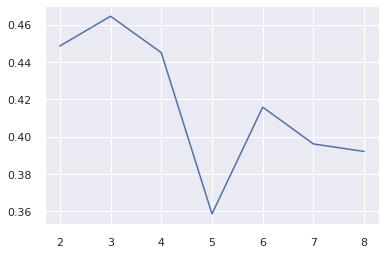

In [ ]:
sil_score = []
cluster_list = list(range(2, 9))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**From the silhouette scores, it seems that 3 is a good value of k.**

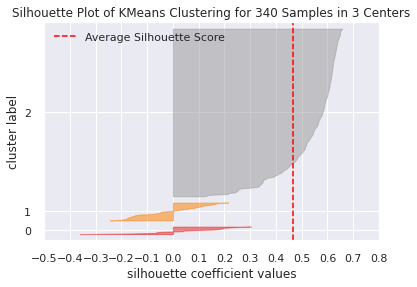

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

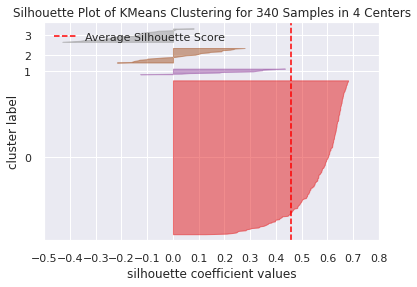

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

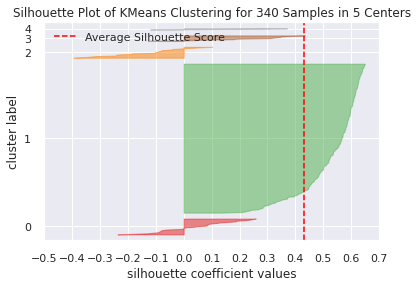

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

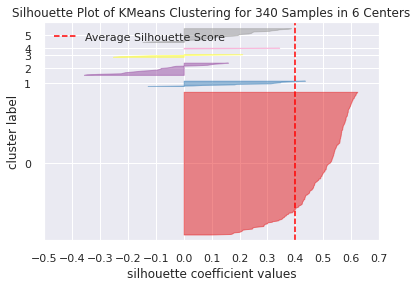

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

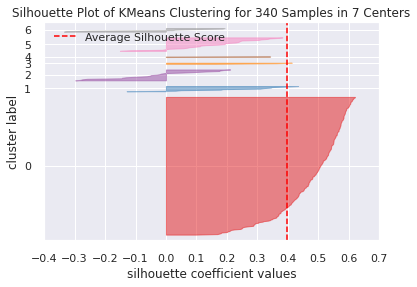

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

**Let's take 3 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 3 in the elbow curve.**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [ ]:
cluster_profile1 = df.groupby("K_means_segments").mean()

In [ ]:
cluster_profile1["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Net_Income"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,84.250468,5.595187,1.402117,34.146758,66.815700,10741689.419795,1449597119.453925,3.902338,426357529.820239,24.416003,-2.011211,293
1,52.142857,6.779993,1.175153,26.142857,140.142857,760285714.285714,13368785714.285715,3.769286,3838879870.871428,20.654832,-3.529270,14
2,62.963940,-10.537087,2.774534,93.696970,68.757576,154287151.515152,-3145581545.454545,-7.639091,530986678.995151,110.461063,1.651207,33


## Insights
### Cluster 0
- Cluster 0 has the highest distribution of Net_Income at 293.
- Current stock Price highest at Zero
- Earnings Per Share highest at Cluster 0

### Cluster 1
- Cluster 1 has the lowest distribution (14) of Net_Income
- Has the lowest P/B ratio
- Has highest clustering of Estimated_Shares_Outstanding, Net_Income, Net_Cash_Flow

### Cluster 2
- Has lowest price chnage and Easrnings Per Share.
- Has the second highest distribution (33) 
- Has lowest Net_Income

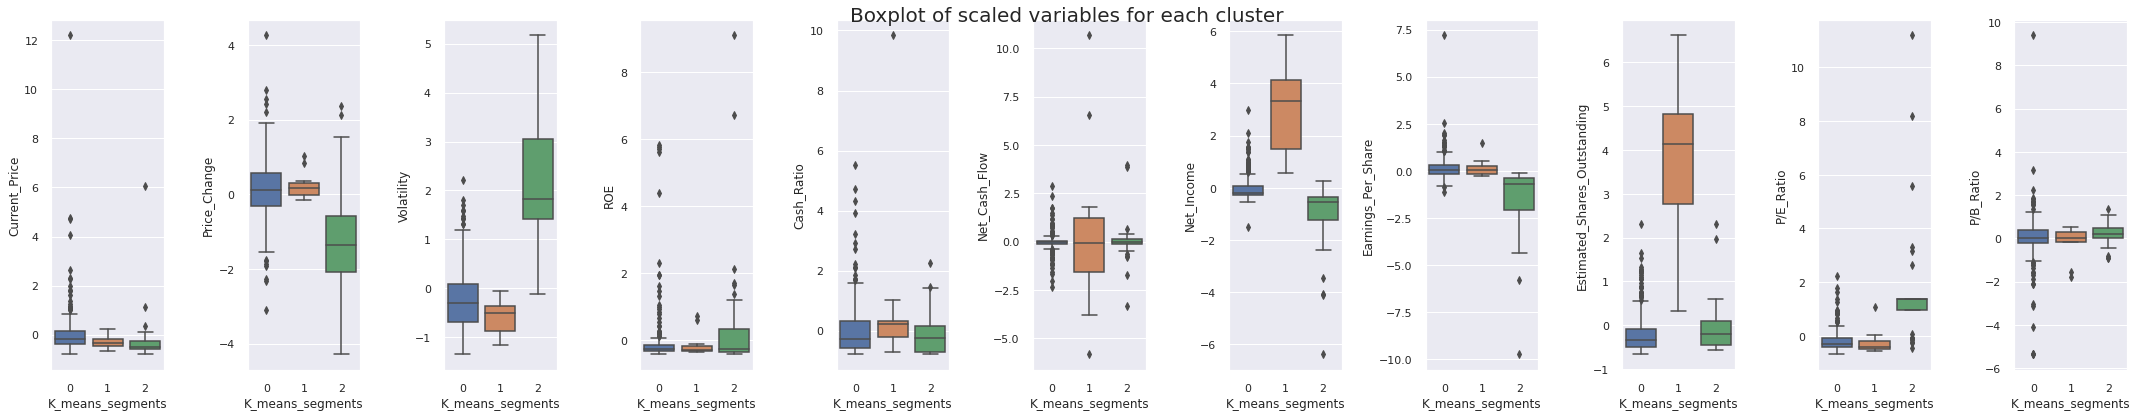

In [ ]:
fig, axes = plt.subplots(1, 11, figsize=(30, 6))
fig.suptitle("Boxplot of scaled variables for each cluster", fontsize=20)
counter = 0
for ii in range(11):
    sns.boxplot(ax=axes[ii], y=subset_scaled_df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

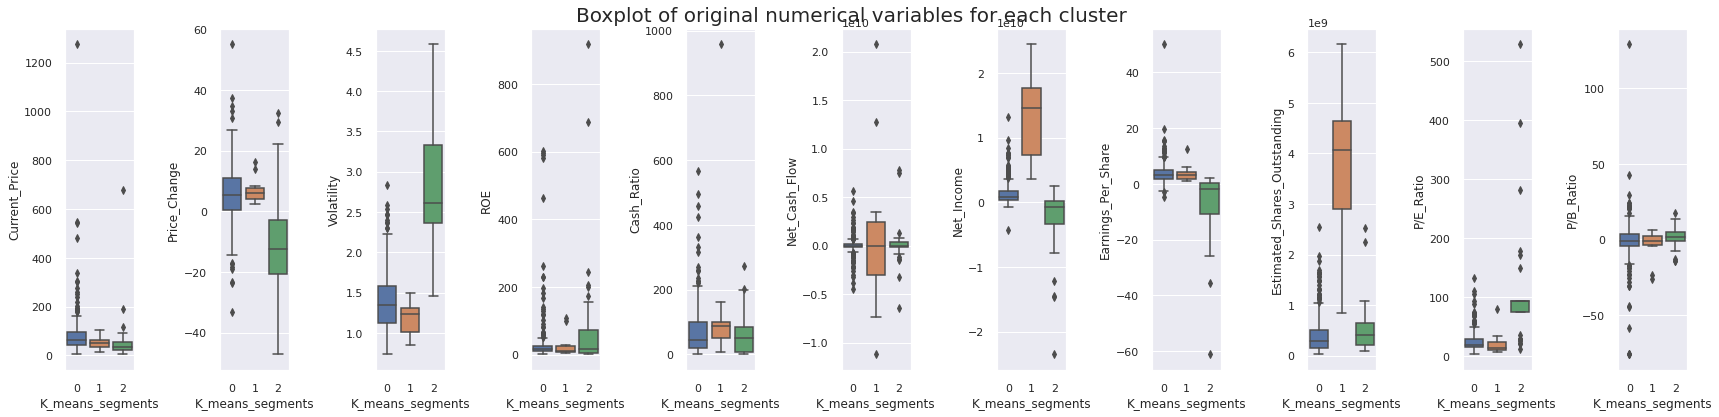

In [ ]:
fig, axes = plt.subplots(1, 11, figsize=(24, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(11):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

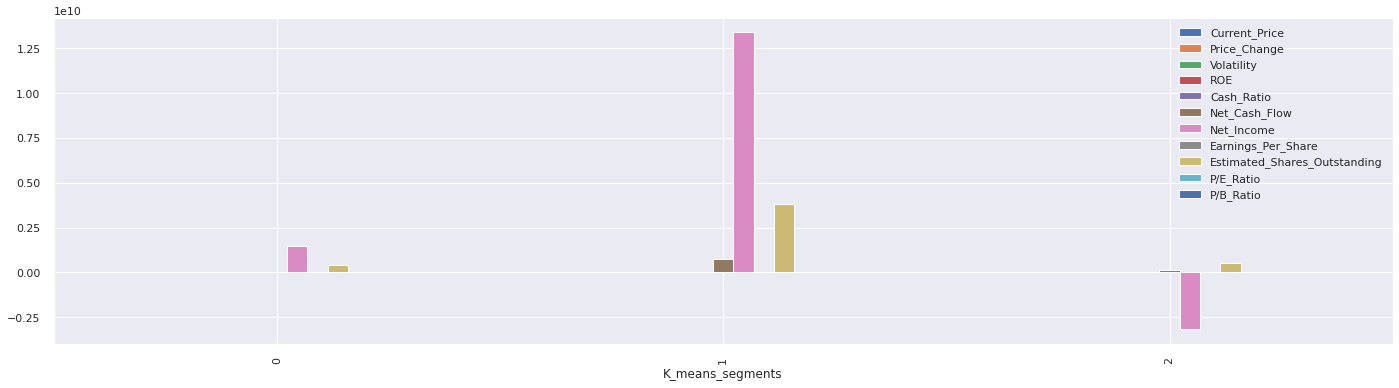

In [ ]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(24, 6))

### Lets Compare Cluster Vs GICS Sector

In [ ]:
pd.crosstab(df.K_means_segments, df.GICS_Sector).style.highlight_max(
    color="lightgreen", axis=0
)

GICS_Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
K_means_segments,,,,,,,,,,,
0,37,18,5,45,36,52,27,19,27,3,24
1,1,1,1,4,3,0,2,0,0,2,0
2,2,0,24,0,1,1,4,1,0,0,0


- Cluster segment 0 has the highest segmentation of the economy with exeption of the Energy Sector.
- Energy Sector has highest results in Cluster 2
- There are no Clusters for Industrials, Materials, Real Estate and Utilities sectors of the economy(GICS)

### Lets Compare Cluster Vs Company

In [ ]:
pd.crosstab(df.K_means_segments, df.Company).style.highlight_max(
    color="lightgreen", axis=0
)

Company,3M Company,AFLAC Inc,AMETEK Inc,AT&T Inc,AbbVie,Abbott Laboratories,Activision Blizzard,Adobe Systems Inc,Affiliated Managers Group Inc,Akamai Technologies Inc,Alaska Air Group Inc,Albemarle Corp,Alexion Pharmaceuticals,Allegion,Alliance Data Systems,Alliant Energy Corp,Allstate Corp,Altria Group Inc,Amazon.com Inc,Ameren Corp,American Airlines Group,American Electric Power,American Express Co,"American International Group, Inc.",American Tower Corp A,American Water Works Company Inc,Ameriprise Financial,Amgen Inc,Amphenol Corp,Anadarko Petroleum Corp,"Analog Devices, Inc.",Anthem Inc.,Aon plc,Apache Corporation,Apartment Investment & Mgmt,Applied Materials Inc,Archer-Daniels-Midland Co,Arconic Inc,Arthur J. Gallagher & Co.,Assurant Inc,AutoNation Inc,"AvalonBay Communities, Inc.",BB&T Corporation,BIOGEN IDEC Inc.,Baker Hughes Inc,Ball Corp,Bank of America Corp,Bard (C.R.) Inc.,Baxter International Inc.,Boeing Company,BorgWarner,Boston Properties,Boston Scientific,Bristol-Myers Squibb,Broadcom,C. H. Robinson Worldwide,CBRE Group,CF Industries Holdings Inc,CIGNA Corp.,CME Group Inc.,CMS Energy,CSX Corp.,CVS Health,Cabot Oil & Gas,Capital One Financial,Carnival Corp.,Caterpillar Inc.,Celgene Corp.,Centene Corporation,CenterPoint Energy,CenturyLink Inc,Charles Schwab Corporation,Charter Communications,Chesapeake Energy,Chevron Corp.,Chipotle Mexican Grill,Chubb Limited,Church & Dwight,Cimarex Energy,Cincinnati Financial,Citigroup Inc.,Citizens Financial Group,Citrix Systems,Coca Cola Company,Cognizant Technology Solutions,Colgate-Palmolive,Comerica Inc.,Concho Resources,Consolidated Edison,Corning Inc.,Crown Castle International Corp.,Cummins Inc.,DaVita Inc.,Danaher Corp.,Deere & Co.,Delphi Automotive,Delta Air Lines,Dentsply Sirona,Devon Energy Corp.,Digital Realty Trust,Discover Financial Services,Discovery Communications-A,Discovery Communications-C,Dominion Resources,Dover Corp.,Dr Pepper Snapple Group,Du Pont (E.I.),Duke Energy,Dun & Bradstreet,E*Trade,EOG Resources,EQT Corporation,Eastman Chemical,Eaton Corporation,Ecolab Inc.,Edison Int'l,Edwards Lifesciences,Entergy Corp.,Equifax Inc.,Equinix,Equity Residential,"Essex Property Trust, Inc.",Eversource Energy,Exelon Corp.,Expedia Inc.,Expeditors Int'l,Extra Space Storage,Exxon Mobil Corp.,FLIR Systems,FMC Corporation,Facebook,Fastenal Co,Federal Realty Investment Trust,Fidelity National Information Services,First Solar Inc,FirstEnergy Corp,Fiserv Inc,Flowserve Corporation,Fluor Corp.,Ford Motor,Fortune Brands Home & Security,Freeport-McMoran Cp & Gld,Frontier Communications,Garmin Ltd.,General Dynamics,General Growth Properties Inc.,General Motors,Genuine Parts,Gilead Sciences,Goodyear Tire & Rubber,Grainger (W.W.) Inc.,HCA Holdings,HCP Inc.,HP Inc.,Halliburton Co.,Harley-Davidson,Hartford Financial Svc.Gp.,Hasbro Inc.,Henry Schein,Hess Corporation,Hewlett Packard Enterprise,Honeywell Int'l Inc.,Hormel Foods Corp.,Host Hotels & Resorts,Humana Inc.,Huntington Bancshares,IDEXX Laboratories,Illinois Tool Works,Intel Corp.,International Business Machines,International Paper,Interpublic Group,Intl Flavors & Fragrances,Intuitive Surgical Inc.,Invesco Ltd.,Iron Mountain Incorporated,J. B. Hunt Transport Services,JPMorgan Chase & Co.,Jacobs Engineering Group,Juniper Networks,Kansas City Southern,Kimberly-Clark,Kimco Realty,Kinder Morgan,L-3 Communications Holdings,LKQ Corporation,Laboratory Corp. of America Holding,Leggett & Platt,Lennar Corp.,Leucadia National Corp.,Level 3 Communications,Lilly (Eli) & Co.,Lockheed Martin Corp.,LyondellBasell,M&T Bank Corp.,Macerich,Marathon Oil Corp.,Marathon Petroleum,Marriott Int'l.,Marsh & McLennan,Martin Marietta Materials,Masco Corp.,Mastercard Inc.,Mattel Inc.,McCormick & Co.,McDonald's Corp.,Mead Johnson,Merck & Co.,MetLife Inc.,Mettler Toledo,Mid-America Apartments,Mohawk Industries,Molson Coors Brewing Company,Mondelez International,Monster Beverage,Moody's Corp,Murphy Oil,Mylan N.V.,NASDAQ OMX Group,National Oilwell Varco Inc.,

- Most Stocks are trading under Cluster 0

## Hierarchical Clustering

In [ ]:
# Checking info of various data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Company                       340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

In [ ]:
# Make a copy
df1 = df.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Company                       340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

In [ ]:
# dropping the serial no. column as it does not provide any information
df1.drop("K_means_segments", axis=1, inplace=True)

In [ ]:
sc = StandardScaler()
subset_scaled_df1 = pd.DataFrame(
    sc.fit_transform(df1.drop(["Ticker_Symbol", "Company","GICS_Sector","GICS_Sub_Industry"], axis=1)),
    columns=df1.drop(["Ticker_Symbol", "Company","GICS_Sector","GICS_Sub_Industry"], axis=1).columns,
)
subset_scaled_df1.head()

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,-0.393,0.494,0.273,0.990,-0.211,-0.339,1.554,1.309,0.108,-0.652,-0.507
1,-0.221,0.355,1.137,0.938,0.077,-0.002,0.928,0.057,1.250,-0.312,-0.504
2,-0.367,0.602,-0.427,-0.193,-0.033,0.454,0.744,0.025,1.098,-0.392,0.095
3,0.134,0.826,-0.285,-0.317,1.218,-0.152,-0.220,-0.231,-0.092,0.947,0.424
4,-0.261,-0.493,0.296,-0.266,2.237,0.134,-0.203,-0.375,1.978,3.293,0.199


In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df1, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df1))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002923.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129403.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750721.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.792530720285.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correlation

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df1, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df1))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002923.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828153.
Cophenetic correlation for ward linkage is 0.7101180299865354.
Cophenetic correlation for weighted linkage is 0.8693784298129403.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

**Let's see the dendrograms for the different linkage methods.**

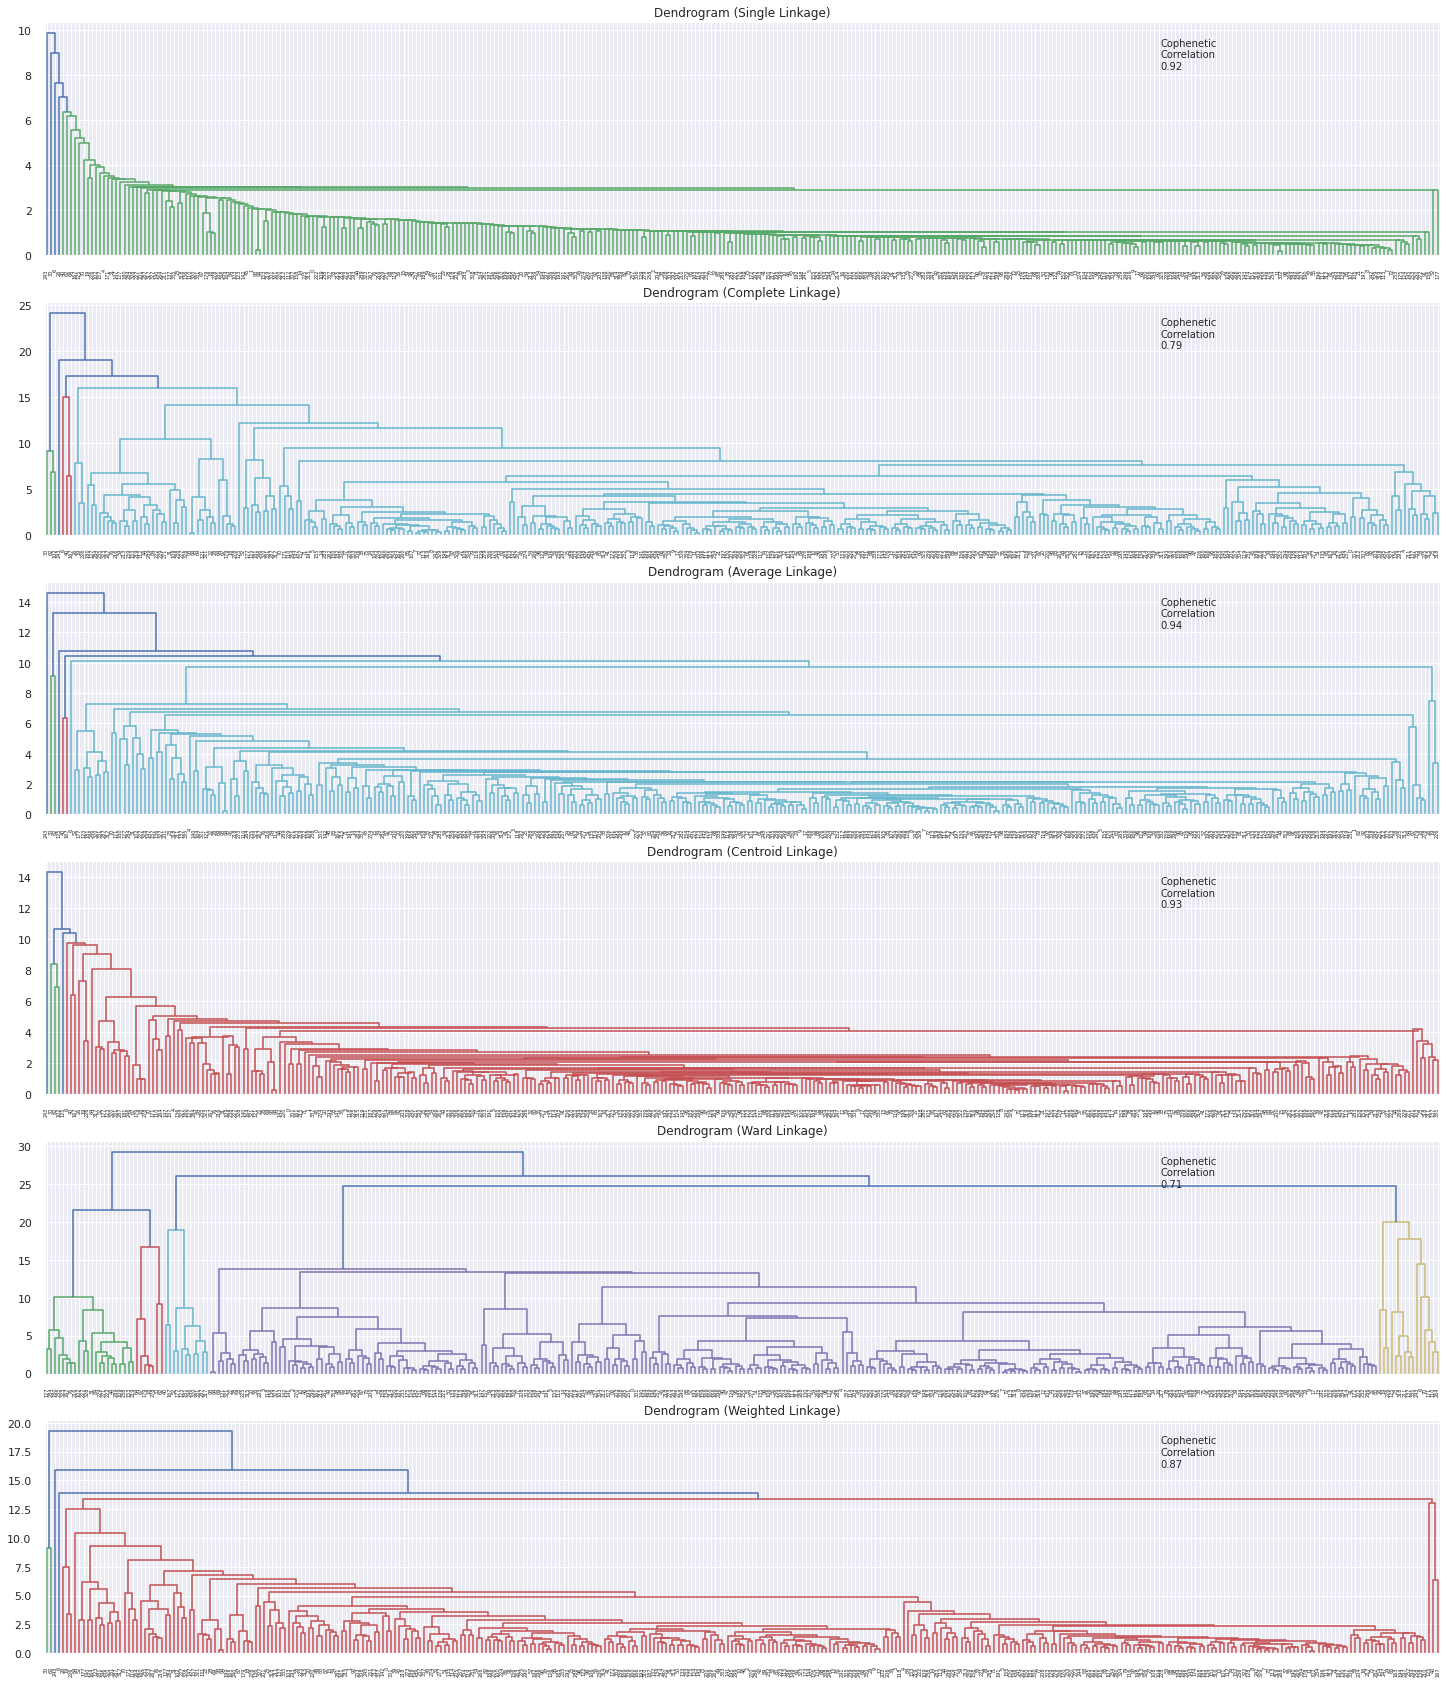

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(25, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df1, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df1))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

- The cophenetic correlation is highest for average method.
- 4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df1)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [ ]:
subset_scaled_df1["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling- Average





In [ ]:
cluster_profile = df1.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Net_Income"].count().values
)

In [ ]:
# let's see the names of economic sector in each cluster
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following Economic Sectors are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["GICS_Sector"].unique())
    print()

In cluster 0, the following Economic Sectors are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Energy' 'Telecommunications Services']

In cluster 2, the following Economic Sectors are present:
['Energy']

In cluster 3, the following Economic Sectors are present:
['Information Technology']

In cluster 1, the following Economic Sectors are present:
['Consumer Discretionary']



- From the above the we have more Economic sectors distributed to Cluster 0 than any other Clusters.
- We shall try on the ward as they seen to be well spread from the dendogram.

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df1)

AgglomerativeClustering(n_clusters=4)

In [ ]:
subset_scaled_df1["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling-Ward

In [ ]:
cluster_profile = df1.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Net_Income"].count().values
)

In [ ]:
# let's see the names of economic sector in each cluster
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following Economic Sectors are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["GICS_Sector"].unique())
    print()

In cluster 3, the following Economic Sectors are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']

In cluster 1, the following Economic Sectors are present:
['Information Technology' 'Health Care' 'Consumer Discretionary'
 'Financials' 'Real Estate' 'Telecommunications Services'
 'Consumer Staples' 'Materials']

In cluster 0, the following Economic Sectors are present:
['Industrials' 'Energy' 'Consumer Discretionary' 'Consumer Staples'
 'Materials' 'Financials' 'Information Technology']

In cluster 2, the following Economic Sectors are present:
['Financials' 'Consumer Discretionary' 'Consumer Staples' 'Health Care'
 'Telecommunications Services' 'Energy']



**Now the clusters seem to have more variability.**

In [ ]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148763,24.188244,-2.966949,275


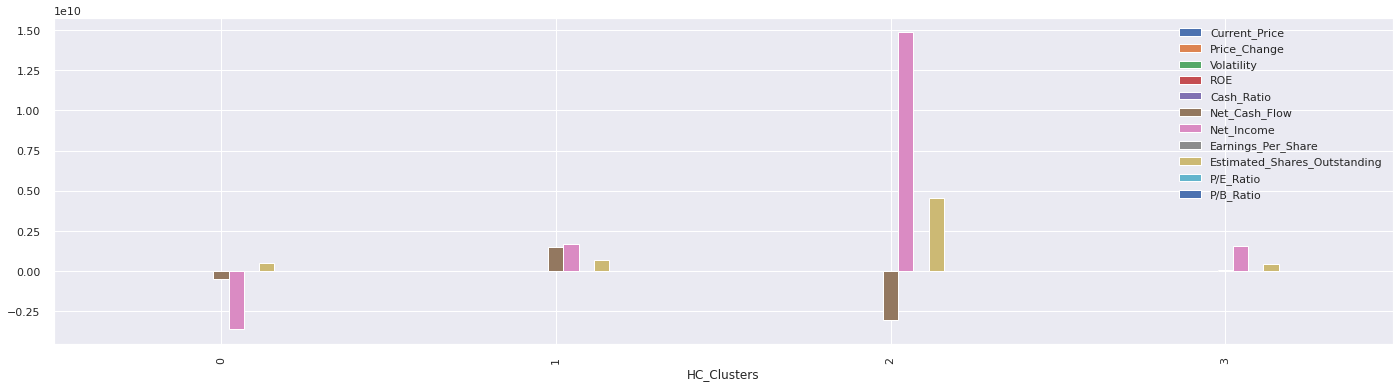

In [ ]:
df1.groupby("HC_Clusters").mean().plot.bar(figsize=(24, 6))

## Insights
### Cluster 0
- There are 29 segments under Net Income
- Volatility and ROE are highest under this Cluster
- Has the lowest Net Income

### Cluster 1
- Has the highest Current Price, Price Change, Cahs Ratio, Net Cash flow, Earnings Per Share, P/E Ratio & P/B Ratio.
- Has 27 feutures under this Cluster

### Cluster 2
- Has 27 Clusters under Net Income
- Has the highest Net Income among all the Clusters
- Has the Lowest Cash Flow

### Cluster 3
- Has the highest count(275) on Net Income as compared to other clusters
- All other measures seems to be moderate under this cluster

### Lets Compare Cluster Vs GICS Sector

In [ ]:
pd.crosstab(df1.HC_Clusters, df1.GICS_Sector).style.highlight_max(
    color="lightgreen", axis=0
)

GICS_Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
HC_Clusters,,,,,,,,,,,
0,1,2,22,1,0,1,1,1,0,0,0
1,5,1,0,1,8,0,9,1,1,1,0
2,1,1,1,3,1,0,0,0,0,2,0
3,33,15,7,44,31,52,23,18,26,2,24


### Insights 

### Cluster 0
- Energy secotor best defines the Company business operation under Cluster 0
- Has no Cluster counts on Real Estate, Utilities, Telecommunication Services sectors of the economy.

### Cluster 1
- Has morate Clusters with no Clusters on Energy, Industrials and Utilities sectors of the economy.

### Cluster 2
- Has the highest contribution on Telecommunication Services sector of the economy

### Custer 3
- Has the highest distribution among all the economic sectors with exeption of the Energy Sector

### Lets Compare Cluster Vs Company

In [ ]:

pd.crosstab(df1.HC_Clusters, df1.Company).style.highlight_max(
    color="lightgreen", axis=0
)

- Cluster 3 has the highest Companies clustering

### Lets Compare Cluster Vs GICS_Sub_Industry

In [ ]:
pd.crosstab(df1.HC_Clusters, df1.GICS_Sub_Industry).style.highlight_max(
    color="lightgreen", axis=0
)

GICS_Sub_Industry,Advertising,Aerospace & Defense,Agricultural Products,Air Freight & Logistics,Airlines,Alternative Carriers,"Apparel, Accessories & Luxury Goods",Application Software,Asset Management & Custody Banks,Auto Parts & Equipment,Automobile Manufacturers,Banks,Biotechnology,Brewers,Broadcasting & Cable TV,Building Products,Cable & Satellite,Casinos & Gaming,Computer Hardware,Construction & Farm Machinery & Heavy Trucks,Construction Materials,Consumer Electronics,Consumer Finance,Copper,Data Processing & Outsourced Services,Distributors,Diversified Chemicals,Diversified Commercial Services,Diversified Financial Services,Drug Retail,Electric Utilities,Electrical Components & Equipment,Electronic Components,Electronic Equipment & Instruments,Environmental Services,Fertilizers & Agricultural Chemicals,Financial Exchanges & Data,Gold,Health Care Distributors,Health Care Equipment,Health Care Facilities,Health Care Supplies,Home Entertainment Software,Home Furnishings,Homebuilding,"Hotels, Resorts & Cruise Lines",Household Appliances,Household Products,Housewares & Specialties,Human Resource & Employment Services,IT Consulting & Other Services,Industrial Conglomerates,Industrial Gases,Industrial Machinery,Industrial Materials,Insurance Brokers,Integrated Oil & Gas,Integrated Telecommunications Services,Internet & Direct Marketing Retail,Internet Software & Services,Investment Banking & Brokerage,Leisure Products,Life & Health Insurance,Life Sciences Tools & Services,Managed Health Care,Metal & Glass Containers,Motorcycle Manufacturers,Multi-Sector Holdings,Multi-line Insurance,MultiUtilities,Networking Equipment,Office REITs,Oil & Gas Equipment & Services,Oil & Gas Exploration & Production,Oil & Gas Refining & Marketing & Transportation,Packaged Foods & Meats,Paper Packaging,Personal Products,Pharmaceuticals,Property & Casualty Insurance,Publishing,REITs,Railroads,Real Estate Services,Regional Banks,Research & Consulting Services,Residential REITs,Restaurants,Retail REITs,Semiconductor Equipment,Semiconductors,Soft Drinks,Specialized REITs,Specialty Chemicals,Specialty Retail,Specialty Stores,Steel,"Technology Hardware, Storage & Peripherals","Technology, Hardware, Software and Supplies",Thrifts & Mortgage Finance,Tires & Rubber,Tobacco,Trucking,Water Utilities
HC_Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,1,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2,4,1,3,5,1,1,0,4,2,1,6,2,1,2,3,2,0,1,3,2,1,5,0,1,1,5,1,6,1,12,1,2,1,1,2,1,0,2,9,5,2,1,1,2,4,1,1,1,1,3,14,1,5,1,3,1,1,1,9,2,2,3,1,5,1,1,1,1,11,1,1,1,1,4,6,2,1,5,8,1,13,4,1,3,4,4,2,4,0,3,2,3,4,1,3,1,1,1,1,1,2,1,1


- Most sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations fall under Cluster 3

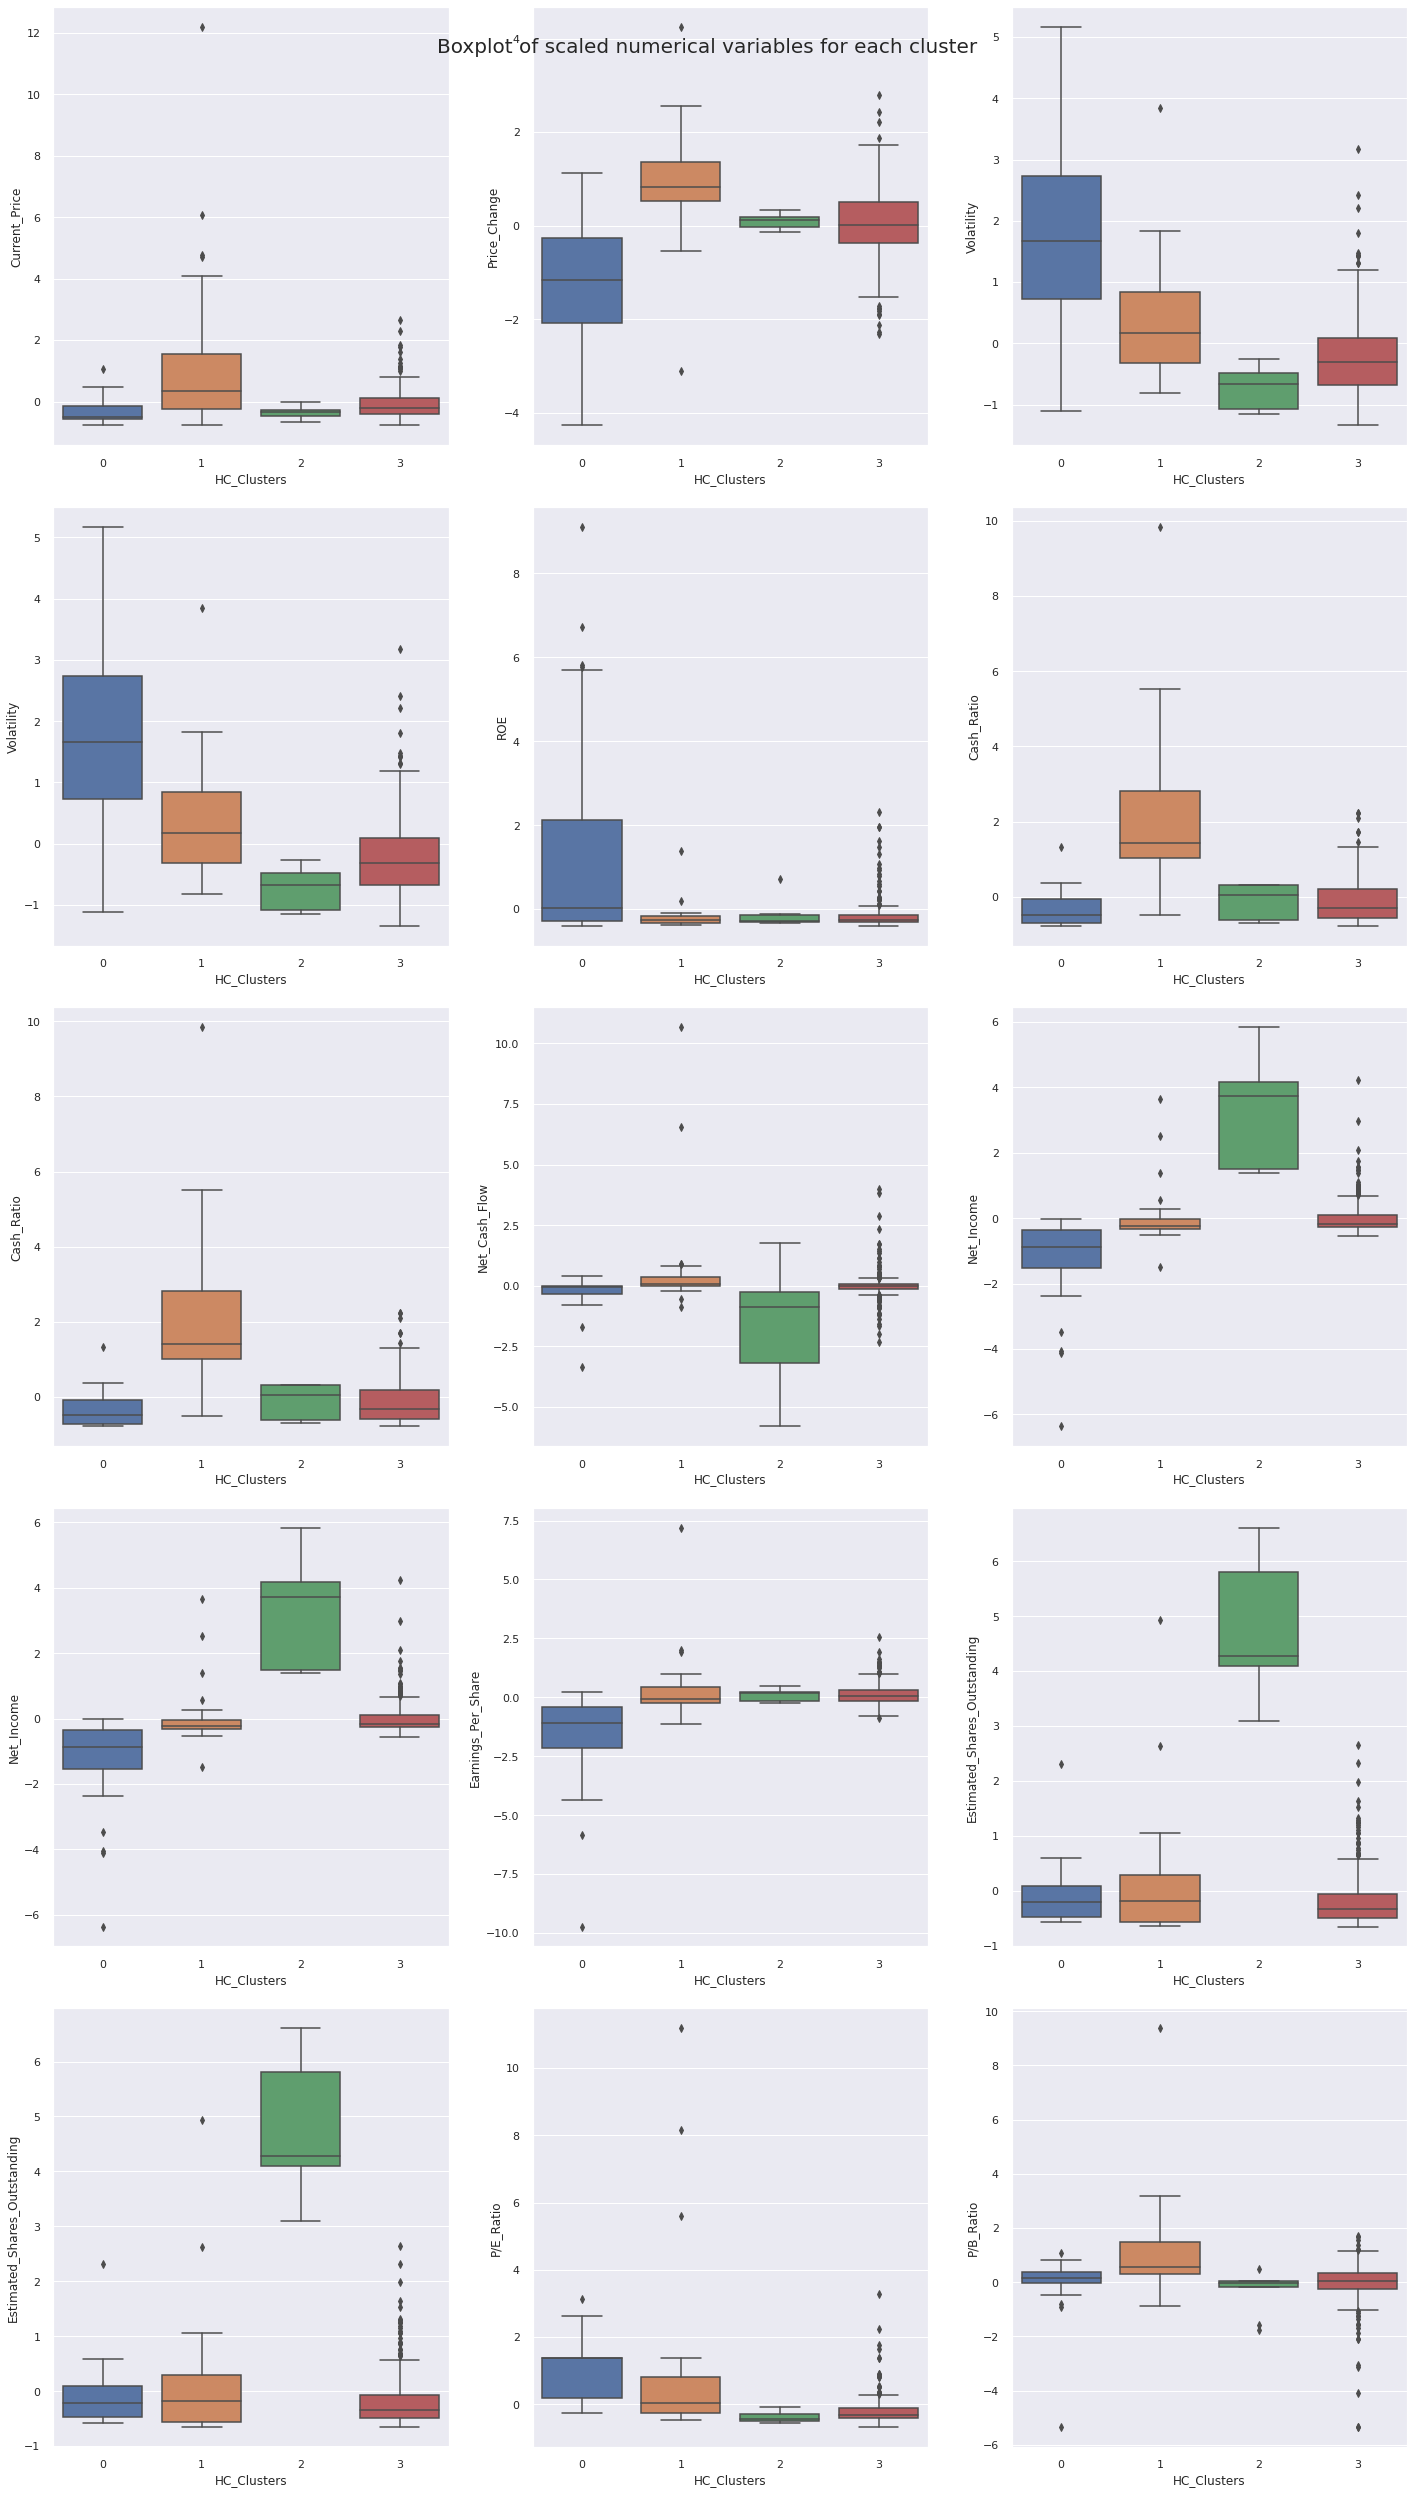

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_df1[num_col[counter]],
        x=subset_scaled_df1["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=subset_scaled_df1[num_col[counter]],
        x=subset_scaled_df1["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=subset_scaled_df1[num_col[counter]],
        x=subset_scaled_df1["HC_Clusters"],
    )
    counter = counter 


fig.tight_layout(pad=2.0)

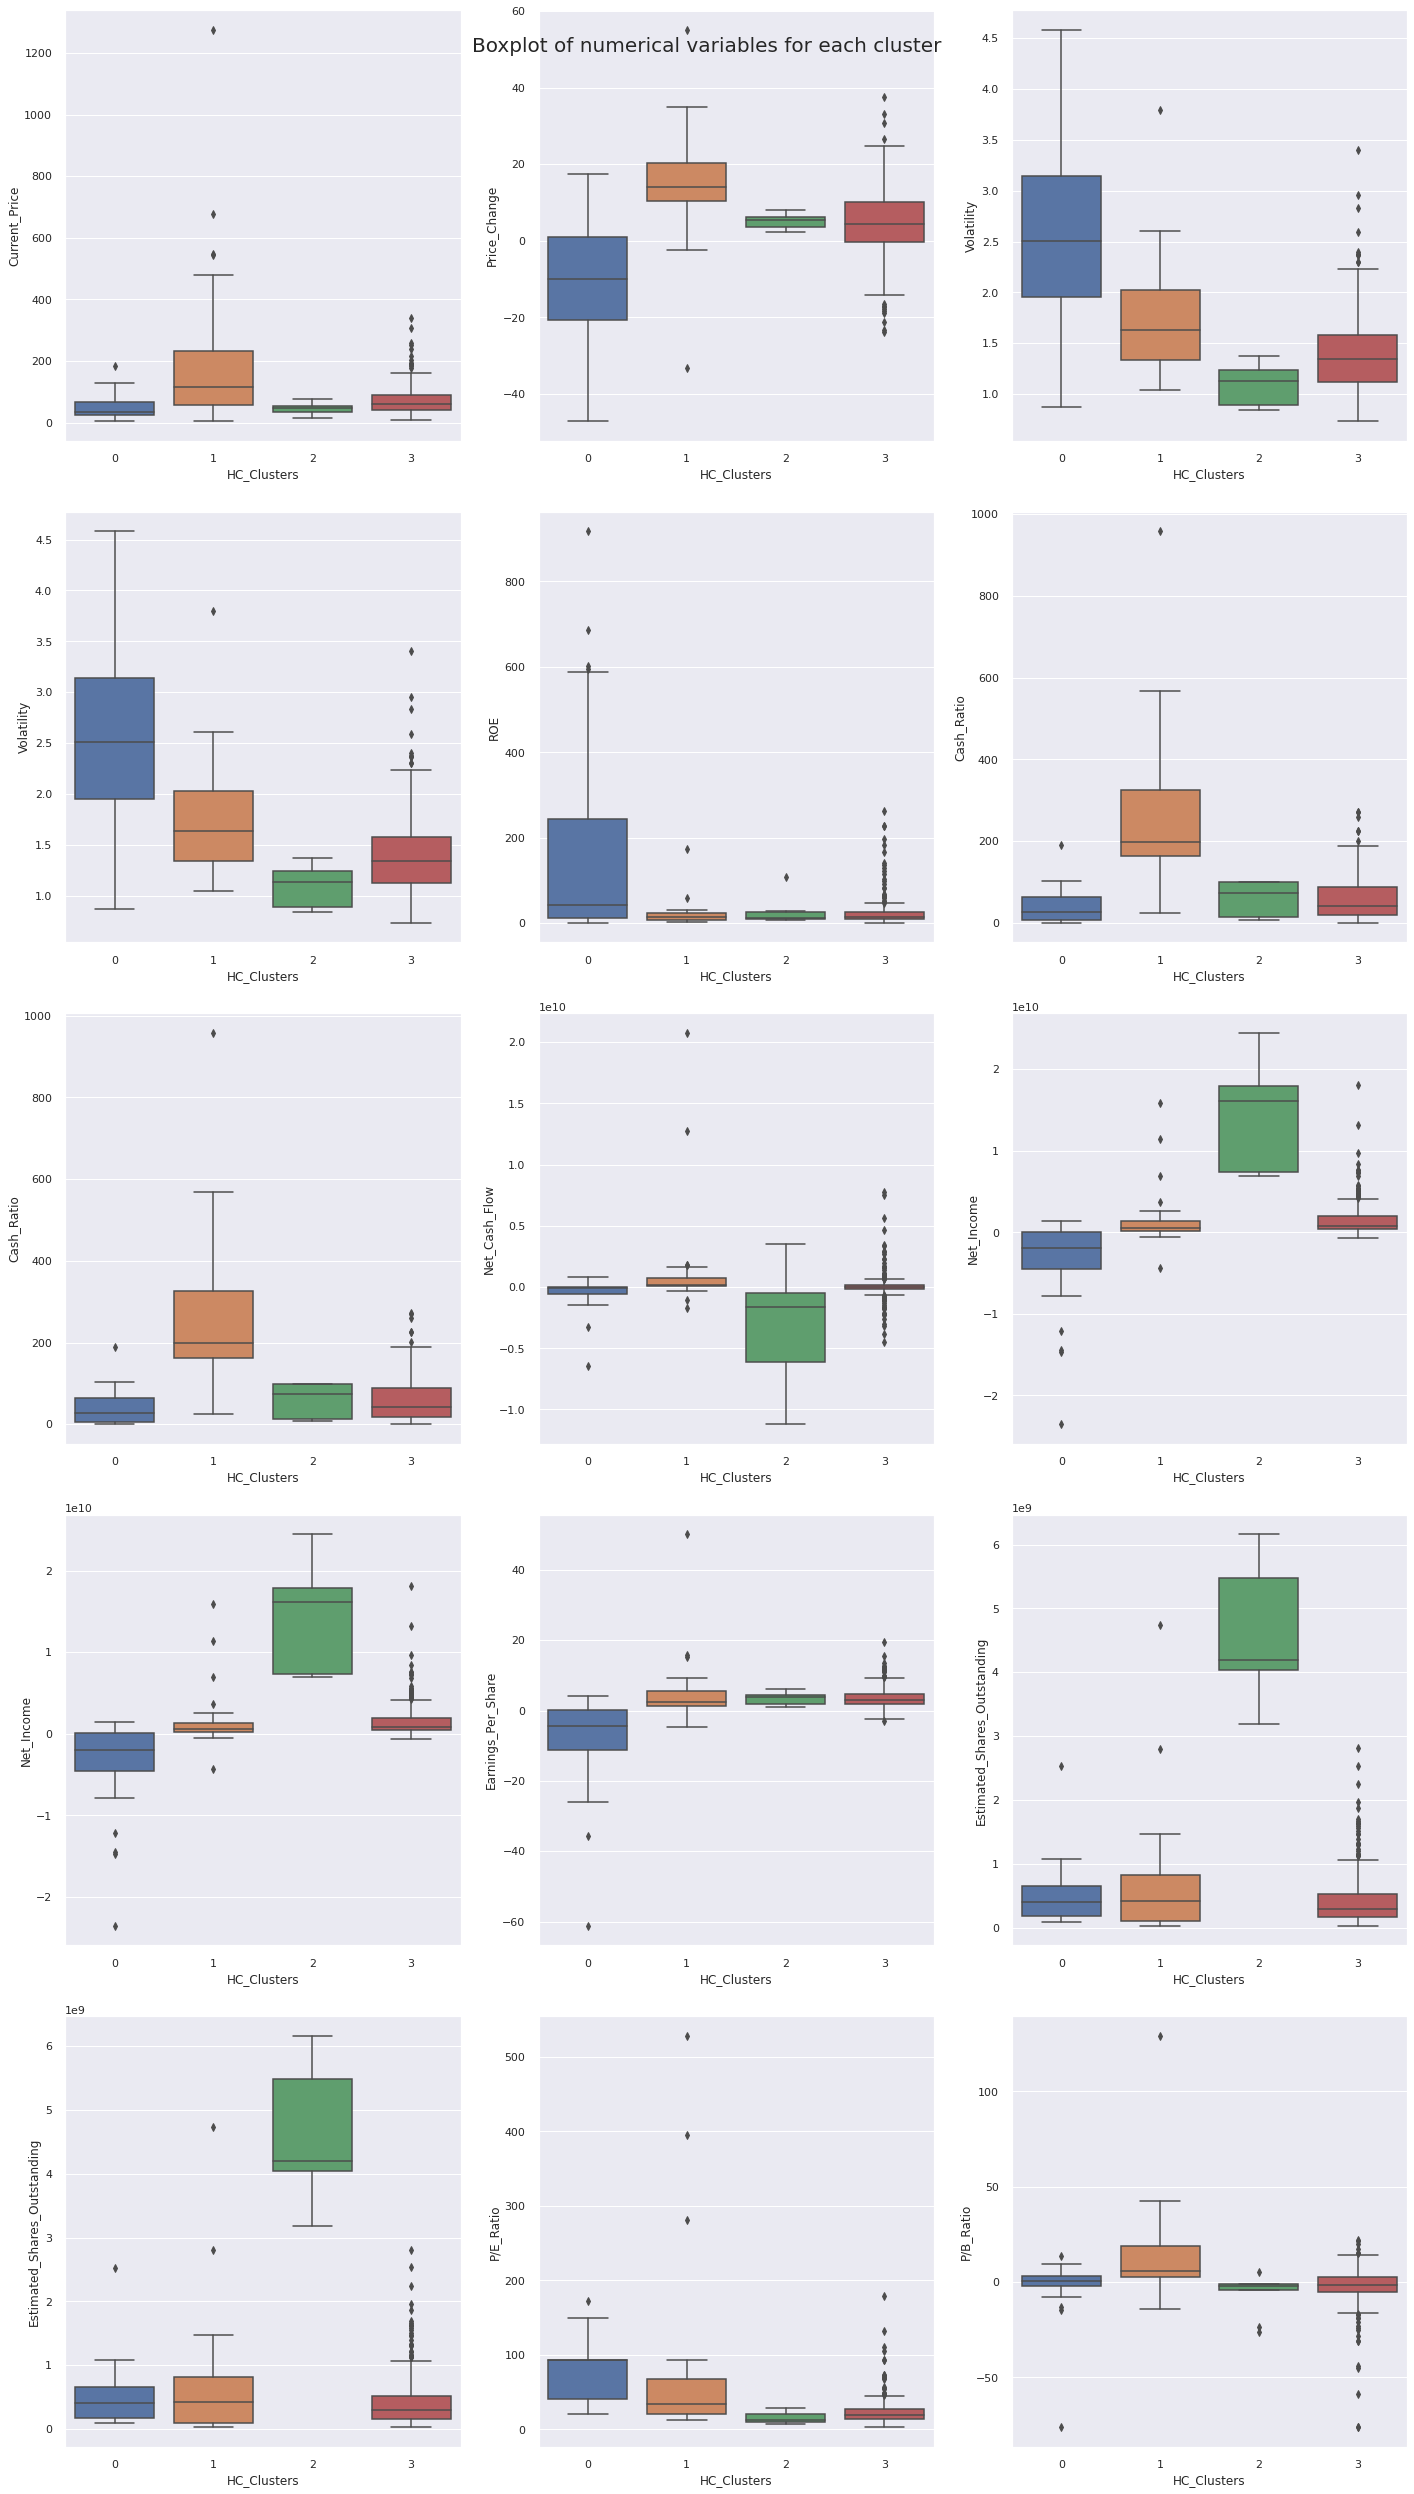

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(20, 35))
fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii][0],
        y=df1[num_col[counter]],
        x=df1["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=df1[num_col[counter]],
        x=df1["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=df1[num_col[counter]],
        x=df1["HC_Clusters"],
    )
    counter = counter 


fig.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148763,24.188244,-2.966949,275


In [ ]:
# let's display cluster profiles
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,84.250468,5.595187,1.402117,34.146758,66.815700,10741689.419795,1449597119.453925,3.902338,426357529.820239,24.416003,-2.011211,293
1,52.142857,6.779993,1.175153,26.142857,140.142857,760285714.285714,13368785714.285715,3.769286,3838879870.871428,20.654832,-3.529270,14
2,62.963940,-10.537087,2.774534,93.696970,68.757576,154287151.515152,-3145581545.454545,-7.639091,530986678.995151,110.461063,1.651207,33


- Hierachial gives more clusters of 4 while K-means gives a Cluster of 3
- Current stock Price highest in Cluster 1 on Hierachial while Cluster 0 is highest on K-Means Clustering.
- Highest Clustering (count) is 293 on Hierachial Clustering while 275 (Cluster3 on K-means Clustering.

## Actionable Insights and Recommendations

- Ticker_Symbol ZBH has high stock price of 102 which is above the average Current Price of 80. Review needs to be conducted on this stock as it seems to perfom well in all other factors however a lower ROE of 1
- Lower Current Price of KMI has impacted on the lower ROE yet Estimated Shares Outstadning is the highest.
- We see two stocks with positive Net_Cash_Flow(The difference between a 
company's cash inflows and outflows (in dollars)), yet the Cash Ratio.This could possibly be missing values.
- There is a large difference on Current Price between the 3rd quartile and the maximum value which could indicate presence of outliers.
- Price change highly affected to negative(47).This could imply poor performance/decrease in Stock Prices that needs to be investigated.
- Cash Ratio of zero(minimum) would imply there is no cash reserves completely while we have liabilities. This needs to be investigated.
-ROE,Earnings Per Share,P/E Ratio and P/B Ratio has a large difference between the max value(75%) and the max value which could indicate possibilities of outliers.
- ROE (Return on Equity) is minimum at 1. It would be interesting to investigating the stocks giving a very low ROE as its not worth to shareholders as compared to maximum value of 917.


